# What insights can the WHAV* diagram give us to the SAMI sample?
---
In applying the WHAV* diagram to 209807, we found that the shocked broad component manifests as a long tail with $\Delta \sigma \gg 0 \,\rm km\,s^{-1}$.

**If an emission line component has $\Delta \sigma \gg 0 \,\rm km\,s^{-1}$, is this a "smoking gun" for shocks?** 
Probably not: in a starburst- or AGN-driven outflow, it could easily arise that the dominant ionisation source in the wind is photoionisation from either of these sources, and that even if there are shocks in the wind, they are out-shined by the photoionisation (e.g., Sharp & Bland-Hawthorn 2010). **The WHAV* diagram might instead be a good indicator of turbulent, non-gravitational gas motions, regardless of the ionisation mechanism present.**

---
**ASIDE: trying to find a simple mathematical argument to rule in/out the presence of a wind (and therefore shocks) based on the AGN luminosity inferred from $L(\rm [O\,OIII])$.** SBH10 unfortunately did not derive an expression relating the AGN luminosity to the energetics of the wind. It might be possible to derive or find in the literature such a relation, but I think this would be complicated by jet-mode AGN activity at low accretion rates, and would be difficult to compare with observations, given the uncertainties in deriving $L_{\rm bol}$. So, I think I'll shelve this for now, and maybe come back to it later.

---
**Can the N2 vs. $\Delta \sigma$ diagram be used as a more robust shock indicator than N2 vs. $\sigma$?** We know that shock models predict that forbidden line ratios correlate with the shock velocity, which is generally reflected in the emission line width; however, such a correlation could also arise from a combination of beam smearing plus a metallicity gradient and/or a stronger contribution from a HOLMES bulge and/or AGN. Substituting $\Delta \sigma$ for $\sigma$ alone will mitigate the effects of beam smearing (somewhat).

## Hypothesis: spaxels in the WHAV* diagram do NOT necessarily represent shocks
---
First, we will find the subset of SAMI galaxies (in our high-S/N sample) with spaxels in the RH plane of the WHAV* diagram by 3$\sigma$.

Then, we will see where these galaxies are in the WHAV and BPT planes. Are they mainly AGN galaxies? Star-forming? Or a bit of both? How are these galaxies different from those in the "normal" region of the WHAV* diagram? Is there a higher incidence of AGN? Are these galaxies more massive? Do they tend to have stronger forbidden lines? etc. 

In [20]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist
from tqdm import tqdm

from spaxelsleuth.loaddata.lzifu import load_lzifu_galaxies
from spaxelsleuth.loaddata.sami import load_sami_galaxies
from spaxelsleuth.plotting.plot2dmap import plot2dmap
from spaxelsleuth.plotting.sdssimg import plot_sdss_image
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn
from spaxelsleuth.plotting.plottools import component_colours, bpt_labels, bpt_colours
from spaxelsleuth.plotting.plotgrids import plot_grids
from spaxelsleuth.plotting.plotgalaxies import plot2dscatter, plot2dhistcontours

import matplotlib
from matplotlib import rc, rcParams
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from IPython.core.debugger import Tracer

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 16})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [3]:
# Options
sami_data_path = "/priv/meggs3/u5708159/SAMI/sami_dr3"
fig_path = "/priv/meggs3/u5708159/SAMI/figs/individual_plots/"
savefigs = True
eline_SNR_min = 3


In [4]:
# Load the DataFrame that gives us the continuum S/N, to define the subset
df_info = pd.read_hdf(os.path.join(sami_data_path, "sami_dr3_metadata_extended.hd5"))

# Load the DataFrame containing AGN classifications
df_classifications = pd.read_hdf(os.path.join(sami_data_path, "sami_dr3_agn_classifications.hd5"), key="AGN")

# Merge with info
df_info = df_info.combine_first(df_classifications)

# Shortlist: median R S/N in 2R_e > 10
gals_all = df_info[df_info["Good?"] == True].index.values
cond_subsample = df_info["Median SNR (R, 2R_e)"] >= 10
cond_subsample &= df_info["Good?"] == True
gals_subsample = df_info[cond_subsample].index.values

# Add extra column to make extraction of properties for the LZIFU sample easier
df_info["In subsample?"] = False
df_info.loc[gals_subsample, "In subsample?"] = True    

In [5]:
# Load the SAMI sample
df_sami = load_sami_galaxies(ncomponents="recom",
                             bin_type="default",
                             eline_SNR_min=eline_SNR_min, 
                             vgrad_cut=False,
                             correct_extinction=False,
                             sigma_gas_SNR_cut=True)


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc,

In [6]:
# Load the LZIFU data
df_lzifu = load_lzifu_galaxies(ncomponents="recom",
                             bin_type="default",
                             eline_SNR_min=eline_SNR_min, 
                             vgrad_cut=False,
                             correct_extinction=False,
                             sigma_gas_SNR_cut=True)


Loading LZIFU DataFrame for all galaxies in the LZIFU subsample...


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/u5708159/python/Modules/spaxelsleuth/loaddata/linefns.py:78: RuntimeWarning: invalid value encountered in add
  return -0.943 * ratio_y_vals**4 - 0.450 * ratio_y_vals**3 + 0.408 * ratio_y_vals**2 - 0.610 * ratio_y_vals - 0.025


In [44]:
# Find the galaxies in our subset with at least 1 component in the RH plane of the WHAV* diagram by 3 sigma
for gal in tqdm(gals_all):
    df_gal = df_sami[df_sami["catid"] == gal]
    cond_rhp_0 = (df_gal["sigma_gas - sigma_* (component 0)"] - 3 * df_gal["sigma_gas - sigma_* error (component 0)"]) > 0
    n_rhp_0 = len(cond_rhp_0[cond_rhp_0])
    cond_rhp_1 = (df_gal["sigma_gas - sigma_* (component 1)"] - 3 * df_gal["sigma_gas - sigma_* error (component 1)"]) > 0
    n_rhp_1 = len(cond_rhp_1[cond_rhp_1])
    cond_rhp_2 = (df_gal["sigma_gas - sigma_* (component 2)"] - 3 * df_gal["sigma_gas - sigma_* error (component 2)"]) > 0
    n_rhp_2 = len(cond_rhp_2[cond_rhp_2])
    if np.any(cond_rhp_0 | cond_rhp_1 | cond_rhp_2):
        df_info.loc[gal, "Spaxels in RHP of WHAV* diagram?"] = True
    else:
        df_info.loc[gal, "Spaxels in RHP of WHAV* diagram?"] = False
    df_info.loc[gal, "Number of components in RHP of WHAV* diagram (component 0)"] = n_rhp_0
    df_info.loc[gal, "Number of components in RHP of WHAV* diagram (component 1)"] = n_rhp_1
    df_info.loc[gal, "Number of components in RHP of WHAV* diagram (component 2)"] = n_rhp_2
        
# Compute the total number of individual emission line components lying in the RHP
df_info["Total number of components in RHP of WHAV* diagram"] = \
    df_info["Number of components in RHP of WHAV* diagram (component 0)"] +\
    df_info["Number of components in RHP of WHAV* diagram (component 1)"] +\
    df_info["Number of components in RHP of WHAV* diagram (component 2)"]

# Get names of galaxies in the RHP and non-RHP subset 
gals_rhp = df_info[df_info["Spaxels in RHP of WHAV* diagram?"] == True].index.values
gals_not_rhp = df_info[df_info["Spaxels in RHP of WHAV* diagram?"] == False].index.values

gals_rhp_subsample = [g for g in gals_rhp if g in gals_subsample]
gals_not_rhp_subsample = [g for g in gals_not_rhp if g in gals_subsample]

100%|██████████| 3005/3005 [00:29<00:00, 102.67it/s]


In [47]:
# Extract information ONLY for our subset
df_info_subsample = df_info.loc[gals_subsample]

df_info["Spaxels in RHP of WHAV* diagram?"]

catid
6837          False
7139           True
7206           True
7289           True
7715           True
              ...  
9403801268     True
9403801272     True
9403801281     True
9403801368     True
9403801579     True
Name: Spaxels in RHP of WHAV* diagram?, Length: 3006, dtype: object

In [48]:
# Quick look at statistics
print("Full SAMI sample:")
print(f"\t{df_info[df_info['Spaxels in RHP of WHAV* diagram?'] == True].shape[0]} in RHP")
print(f"\t{df_info[df_info['Spaxels in RHP of WHAV* diagram?'] == False].shape[0]} not in RHP")
print("")
print("High S/N subsample:")
print(f"\t{df_info_subsample[df_info_subsample['Spaxels in RHP of WHAV* diagram?'] == True].shape[0]} in RHP")
print(f"\t{df_info_subsample[df_info_subsample['Spaxels in RHP of WHAV* diagram?'] == False].shape[0]} not in RHP")

Full SAMI sample:
	1236 in RHP
	1769 not in RHP

High S/N subsample:
	460 in RHP
	239 not in RHP


## What are the properties of *individual emission line components* that have $\Delta \sigma > 0$?
---
Hypothesis: emission line components with $\Delta \sigma > 0$ represent gas with non-gravitational motions. 

* Look at the distribution in BPT category in $\Delta \sigma$.
* Make WHAV* diagrams, but showing each spectral category separately, in a scatter plot. Do components with different spectral classifications have different EW distributions? 


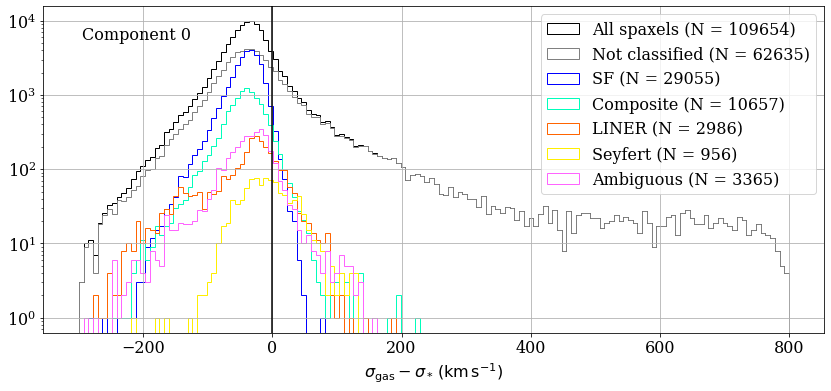

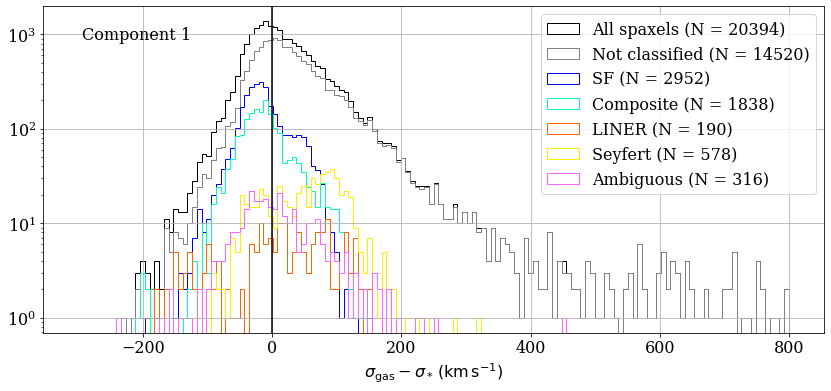

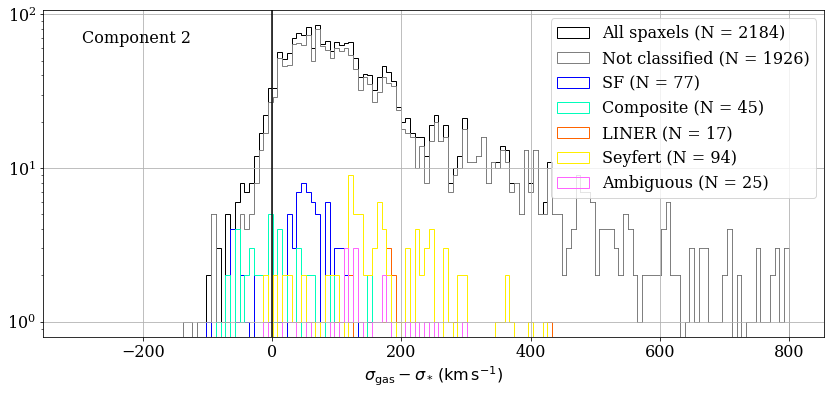

In [11]:
################################################################################################
# Histogram: distribution of each spectral category in sigma_gas - sigma_*, for each component.
################################################################################################
col_x = "sigma_gas - sigma_*"
for ii in range(3):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
    ax.text(x=0.05, y=0.9, s=f"Component {ii}", transform=ax.transAxes)
        
    # Plot the whole sample
    data = df_lzifu[f"{col_x} (component {ii})"]
    ax.hist(data, density=False, range=(-300, +800), bins=150, color="k", histtype="step",
         label=f"All spaxels (N = {data.count()})")    
    
    # Plot each BPT category separately
    for bpt, c in zip(bpt_labels, bpt_colours):
        data = df_lzifu.loc[df_lzifu[f"BPT (component {ii})"] == bpt, f"{col_x} (component {ii})"]
        ax.hist(data, density=False, range=(-300, +800), bins=150, color=c, histtype="step",
             label=f"{bpt} (N = {data.count()})")
        
    # Decorations
    ax.axvline(0, color="k")
    ax.legend()
    ax.set_yscale("log")
    ax.set_xlabel(label_fn(col_x))
    ax.grid()

### Remarks
---
The majority of components that have $\Delta \sigma > 0$ lack spectral classification, presumably due to the low EWs that these components tend to have (see the single-component WHAV* diagrams). 
In the $\Delta \sigma < 0$ domain, SF, composite, and ambiguous components dominate, followed by LINER and Seyfert-like spaxels. This holds for components 0 and 1; in component 2, there are barely any components with $\Delta \sigma < 0$. 
Contrastingly, in the $\Delta \sigma > 0$ domain, the incidence of Seyfert and LINER-type components becomes much stronger. By comparison, there are no SF-like components at all with $\Delta \sigma \gtrsim 100\,\rm km\,s^{-1}$. Indeed, LINER, ambiguous and Seyfert-like emission dominates for large $\Delta \sigma$. 
But, there is still a large fraction of SF-like component 1's - they simply have $\Delta \sigma \lesssim 100\,\rm km\,s^{-1}$. 

To follow up: 
* Are there *any* galaxies with a SF 1st component, and a LINER-like 2nd/3rd component? i.e., **how common are galaxies like 209807?** Can we find a galaxy matched in SFR and stellar mass? **Does it have something to do with the SFR surface density, or with the star formation history?**
* Why are there no SF-like emission line components with $\Delta \sigma \gtrsim 100\,\rm km\,s^{-1}$, whilst there are plenty with ambiguous, composite, LINER and Seyfert-like ratios? **Does this imply that SB-driven winds are less powerful than AGN-driven winds?**

In [31]:
from spaxelsleuth.plotting.plotgalaxies import plot2dhistcontours

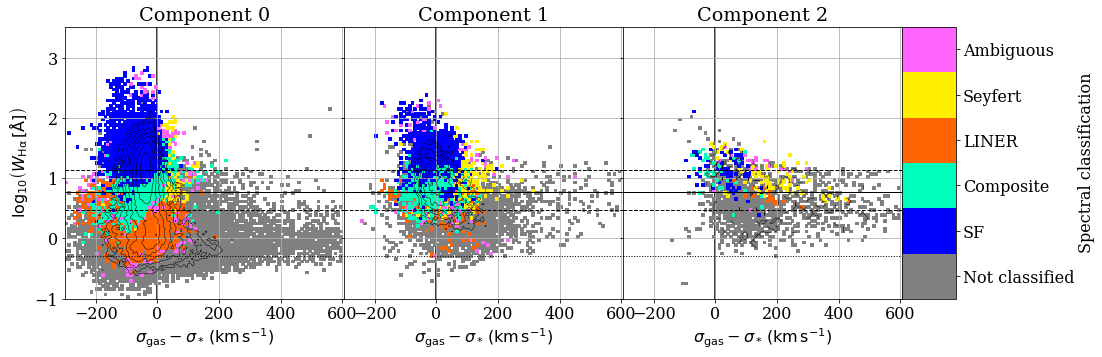

In [42]:
################################################################################################
# WHAV* daigrams coloured by BPT classification
################################################################################################
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(wspace=0)
for ii in range(3):
    plot2dhistcontours(df=df_lzifu,
                       col_x=f"{col_x} (component {ii})",
                       col_y=f"{col_y} (component {ii})",
                       col_z=f"BPT (numeric) (component {ii})",
                       nbins=100,
                       ax=axs[ii], plot_colorbar=True if ii == 2 else False)
    axs[ii].axvline(0, color="k", zorder=0)
    axs[ii].set_title(f"Component {ii}")
    axs[ii].grid()
    axs[ii].set_ylabel("") if ii > 0 else None 
    axs[ii].set_yticklabels([]) if ii > 0 else None 
    


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

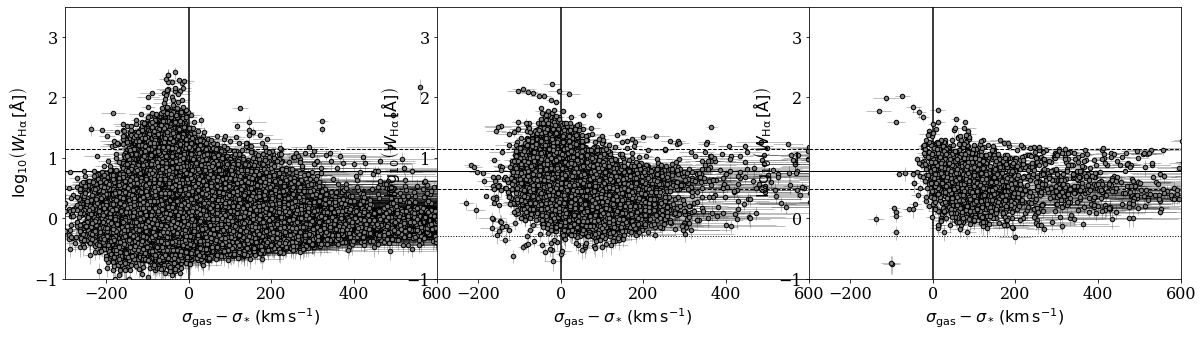

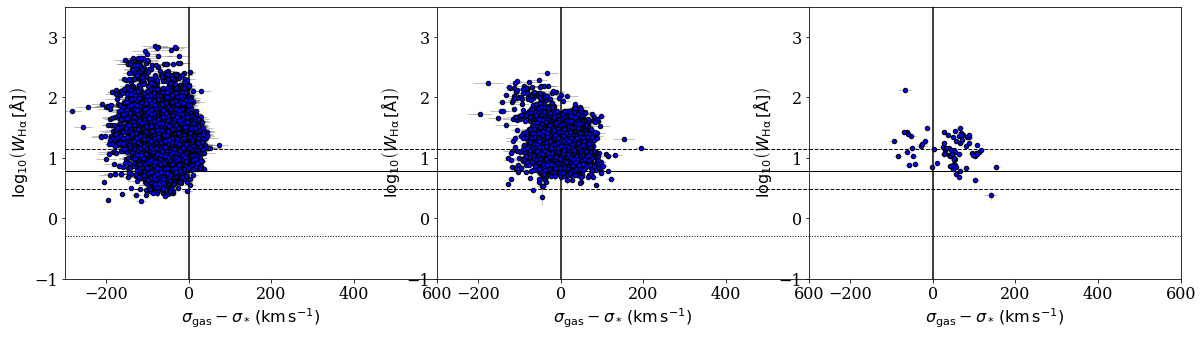

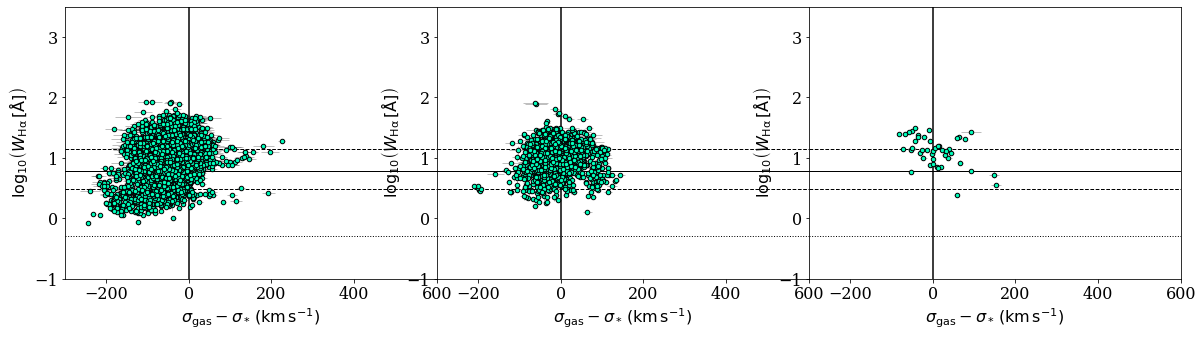

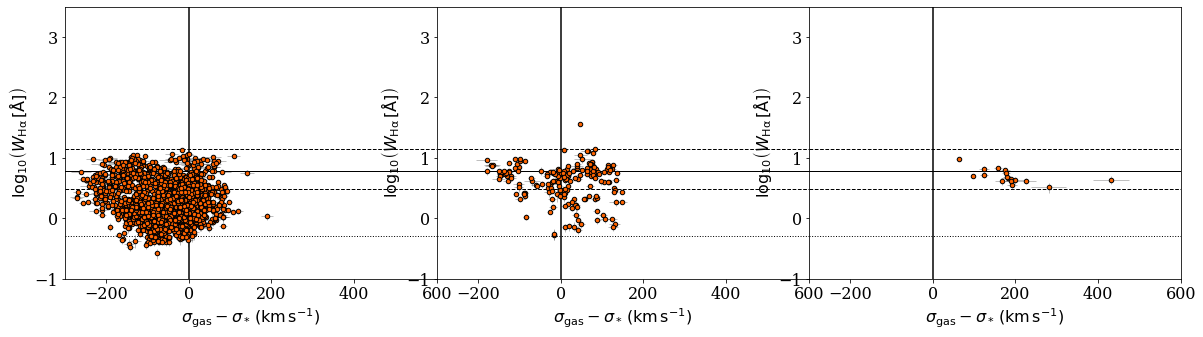

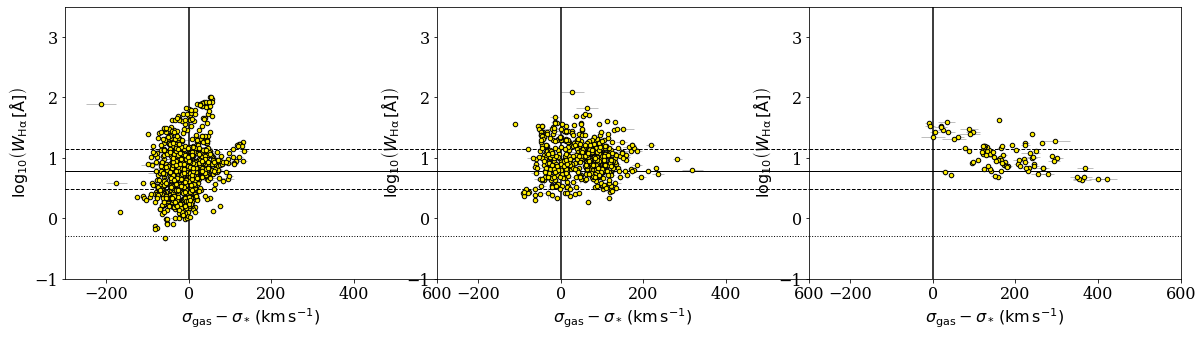

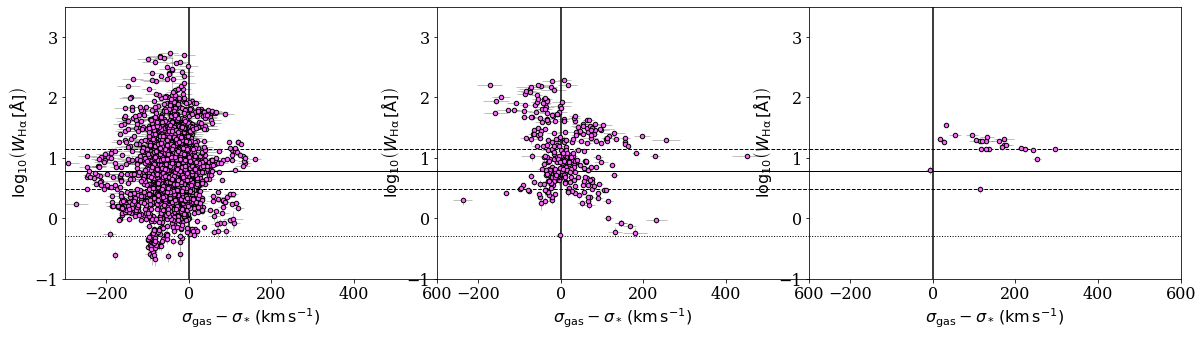

In [9]:
################################################################################################
# WHAV* daigrams, where each BPT classifications is shown separately in a scatter plot.
################################################################################################
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"

for bpt, c in zip(bpt_labels, bpt_colours):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    fig.subplots_adjust(wspace=0)
    for ii in range(3):
        plot2dscatter(df=df_lzifu.loc[df_lzifu[f"BPT (component {ii})"] == bpt],
                      col_x=f"{col_x} (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      ax=axs[ii], plot_colorbar=False,
                      markerfacecolor=c, markeredgecolor="k", markersize=20)
        axs[ii].axvline(0, color="k", zorder=0)


### Remarks
---
There is *no* significant separation in EW between the different sources of excitation in the WHAV* diagram. We can therefore conclude that it's probably not good for distinguishing different excitation mechanisms.

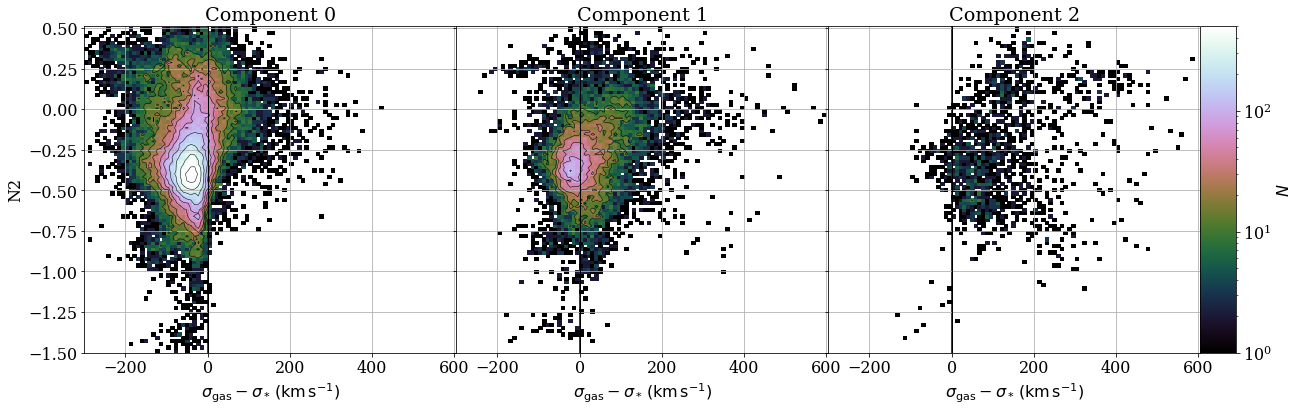

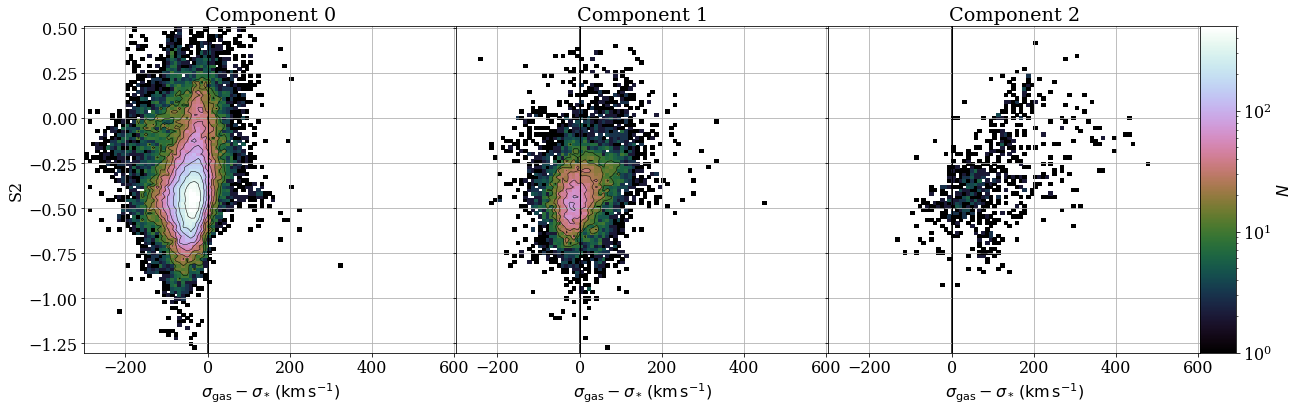

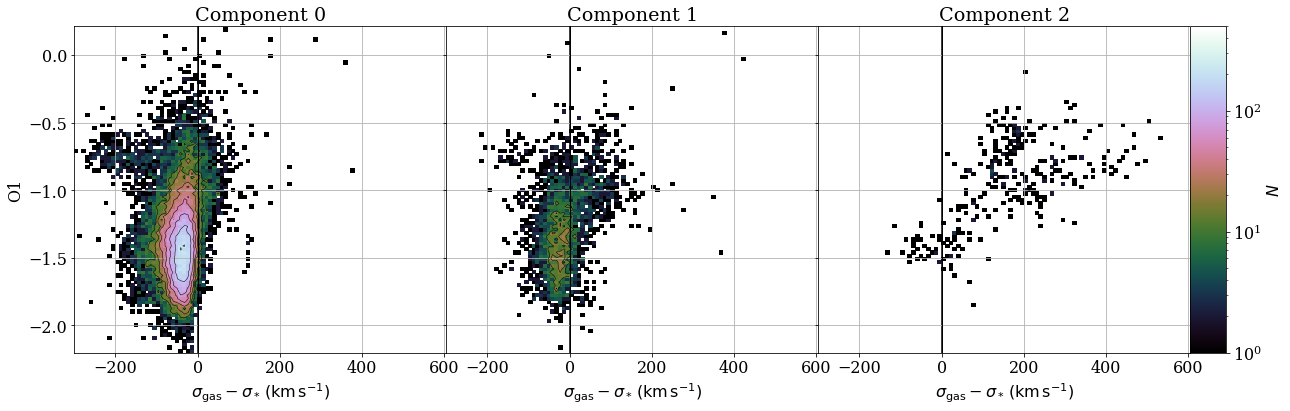

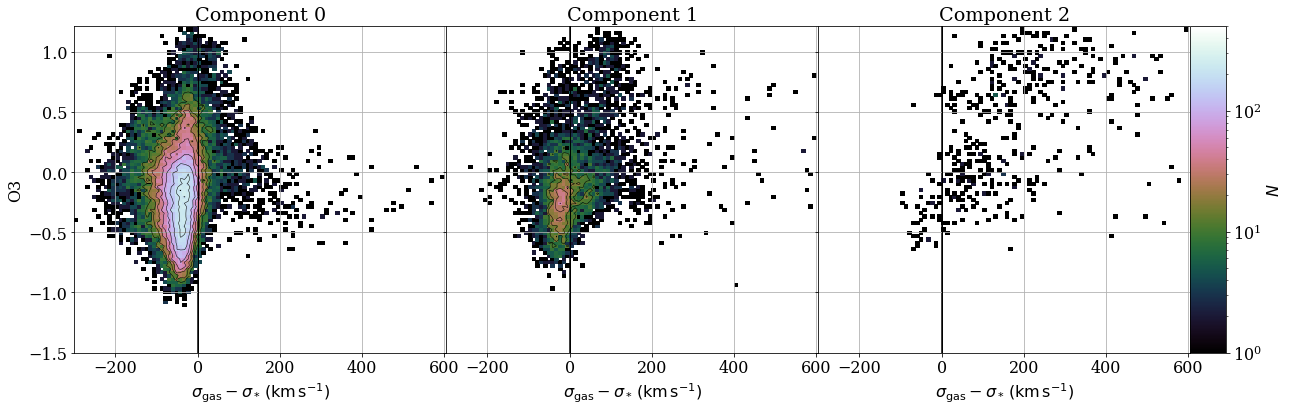

In [41]:
#######################################################################################
# Looking for correlations between delta_sigma and other quantities
#######################################################################################
col_x = "sigma_gas - sigma_*"

#######################################################################################
# Emission line ratios
for col_y in ["log N2", "log S2", "log O1", "log O3"]:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])
    for ii in range(3):
        plot2dhistcontours(df=df_lzifu,
                           col_x=f"{col_x} (component {ii})",
                           col_y=f"{col_y} (component {ii})",
                           col_z="count", log_z=True,
                           vmin=1, vmax=5e2, cmap="cubehelix",
                           ax=axs[ii], plot_colorbar=True if ii == 2 else False, cax=cax)
        axs[ii].axvline(0, color="k", zorder=0)
        axs[ii].grid()
        axs[ii].set_title(f"Component {ii}")
        [ax.set_yticklabels([]) for ax in axs[1:]]
        [ax.set_ylabel("") for ax in axs[1:]]

[Text(0, 0.5, ''), Text(0, 0.5, '')]

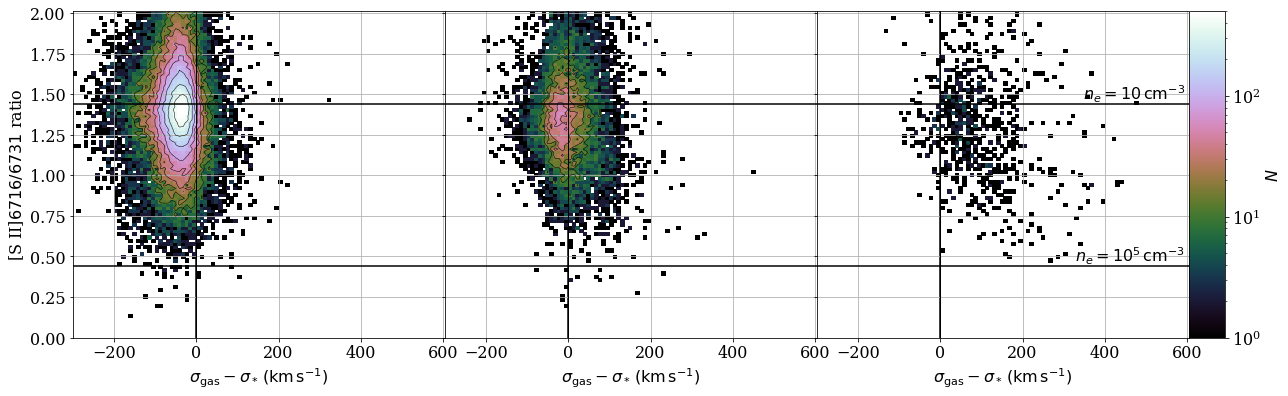

In [39]:
#######################################################################################
# S2 ratio (electron density)
col_y = "S2 ratio"
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])
for ii in range(3):
    plot2dhistcontours(df=df_lzifu,
                       col_x=f"{col_x} (component {ii})",
                       col_y=f"{col_y} (component {ii})",
                       col_z="count", log_z=True,
                       ymin=0, ymax=2,
                       vmin=1, vmax=5e2, cmap="cubehelix",
                       ax=axs[ii], plot_colorbar=True if ii == 2 else False, cax=cax)
    axs[ii].axvline(0, color="k", zorder=0)
    axs[ii].grid()
    axs[ii].axhline(1.44, color="k")
    axs[ii].axhline(0.44, color="k")
axs[-1].text(s=r"$n_e = 10 \,\rm cm^{-3}$", x=axs[-1].get_xlim()[1] - 10, y=1.44, verticalalignment="bottom", horizontalalignment="right")
axs[-1].text(s=r"$n_e = 10^5 \,\rm cm^{-3}$", x=axs[-1].get_xlim()[1] - 10, y=0.44, verticalalignment="bottom", horizontalalignment="right")
[ax.set_yticklabels([]) for ax in axs[1:]]
[ax.set_ylabel("") for ax in axs[1:]]

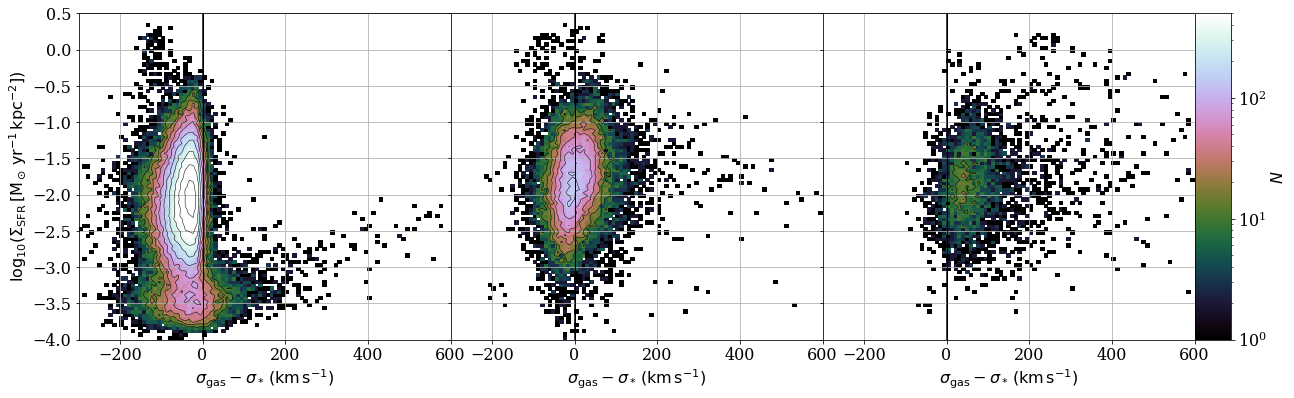

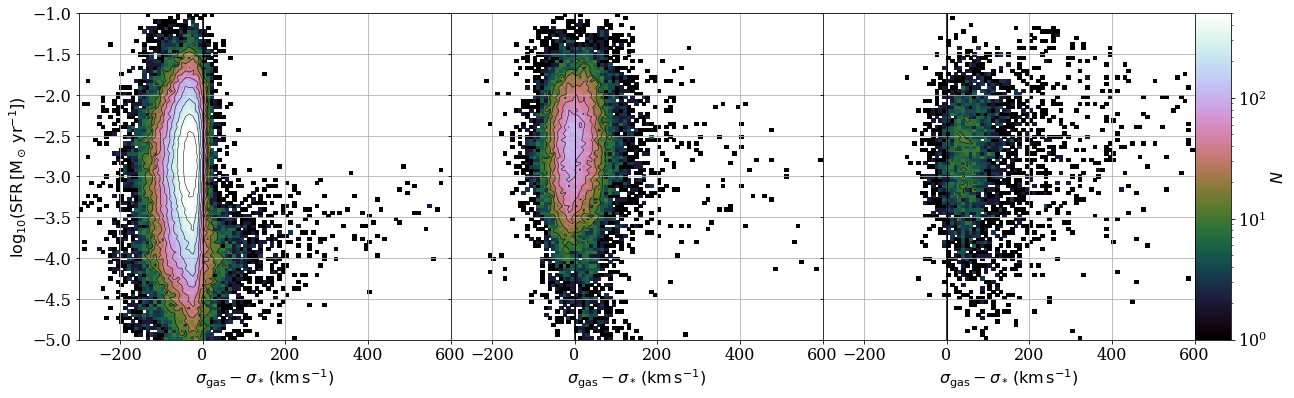

In [40]:
#######################################################################################
# SFR and SFR surface density - can look at whole SAMI sample
#######################################################################################

# DODGY!!!
df = df_sami.copy()
df["log SFR surface density (component 1)"] = df["log SFR surface density (component 0)"]
df["log SFR surface density (component 2)"] = df["log SFR surface density (component 0)"]
df["log SFR (component 1)"] = df["log SFR (component 0)"]
df["log SFR (component 2)"] = df["log SFR (component 0)"]

df_gal = df[df["catid"] == 209807]

for col_y in ["log SFR surface density", "log SFR"]:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])
    for ii in range(3):
        plot2dhistcontours(df=df,
                           col_x=f"{col_x} (component {ii})",
                           col_y=f"{col_y} (component {ii})",
                           col_z="count", log_z=True,
                           vmin=1, vmax=5e2, cmap="cubehelix",
                           ax=axs[ii], plot_colorbar=True if ii == 2 else False, cax=cax)
        plot2dscatter(df=df_gal, 
                      col_x=f"{col_x} (component {ii})",
                      col_y=f"{col_y} (component {ii})",
                      ax=axs[ii], plot_colorbar=False,
                      markerfacecolor="y", markeredgecolor="b")
        axs[ii].axvline(0, color="k", zorder=0)
        axs[ii].grid()
    [ax.set_yticklabels([]) for ax in axs[1:]]
    [ax.set_ylabel("") for ax in axs[1:]]
    

### Remarks
---
We looked into whether there are any correlations between various spaxel-by-spaxel properties and $\Delta \sigma$.

* **Emission line ratios**: in component 2, there are quite strong correlations between N2, S2, O1 and O3 and $\Delta \sigma$, which is qualitatively consistent with predictions from shock models. Similar, albeit weaker, correlations appear in component 1. On average, component 2 has higher O1 and O3 values.
* **Electron density**: components with larger $\Delta \sigma$ tend to have higher $n_e$, but this trend is only visible in the 3rd component; it is tentatively present in component 1 but is not present at all in component 0. The correlation is consistent with shocks.
* **SFR and SFR surface density**: In the LZIFU subsample, a 2nd component is only present when $\Sigma_{\rm SFR} \gtrsim -3 \,\rm M_\odot \, yr^{-1} \, kpc^{-2}$, and a 3rd component is only present when $\Sigma_{\rm SFR} \gtrsim -2 \,\rm M_\odot \, yr^{-1} \, kpc^{-2}$. However, when viewing the whole SAMI sample, the correlation disappears and the distribution in all 3 components is similar. Furthermore, there are no real trends with SFR.

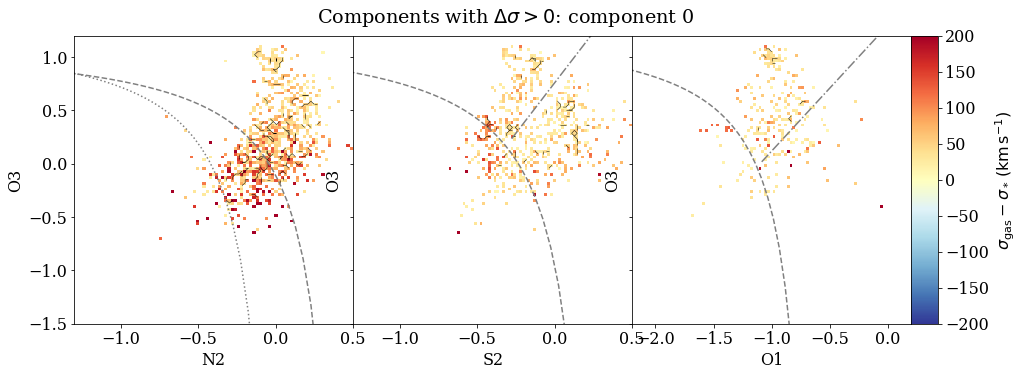

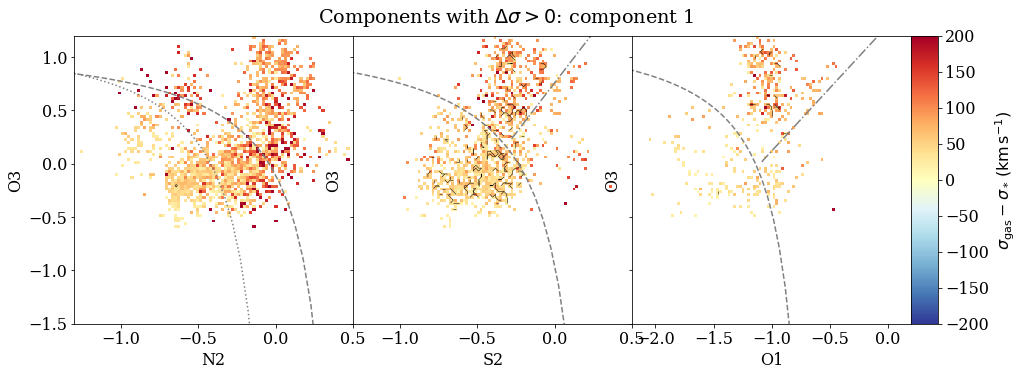

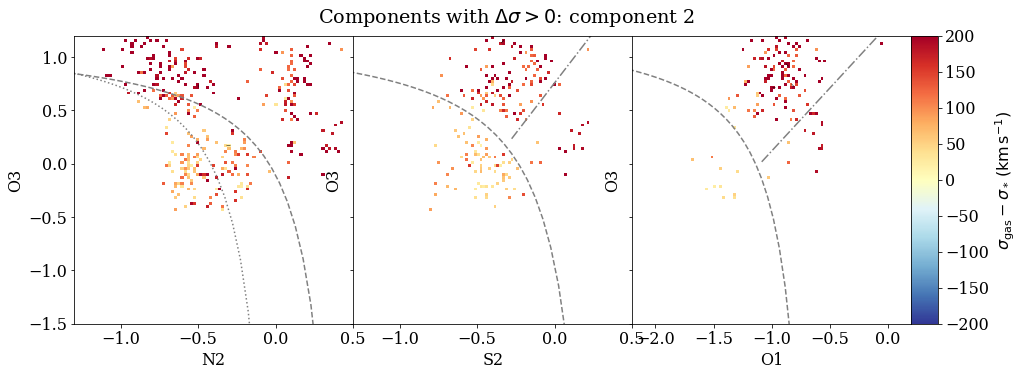

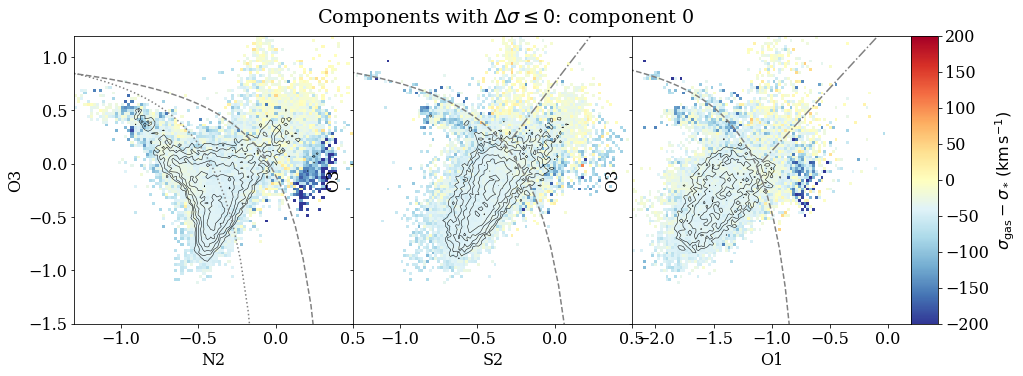

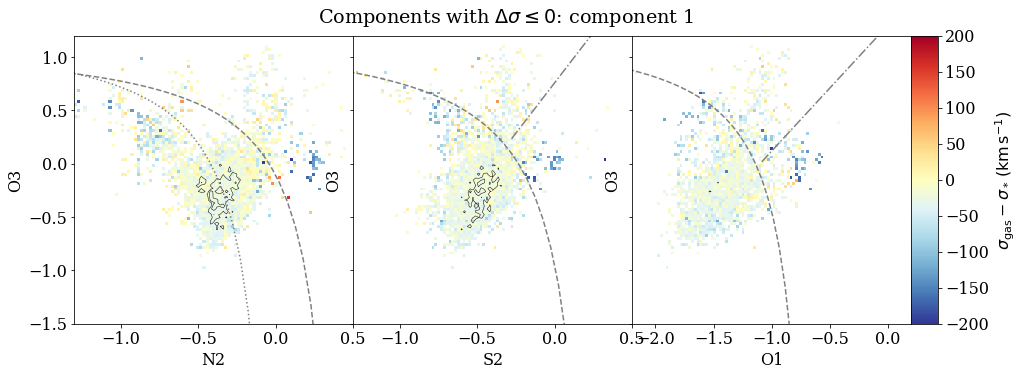

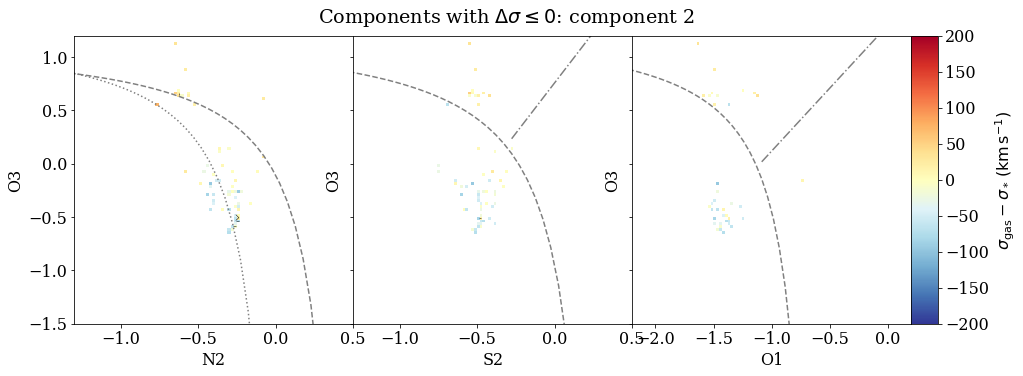

In [15]:
#######################################################################################
# BPT diagram, where we show 2 subsamples separately: 
# spaxels with delta sigma <= 0, and delta sigma > 0 by 3sigma.
#######################################################################################
col_z = "sigma_gas - sigma_*"

# Emission line components in the RHP
for ii in range(3):
    fig, axs, cax = plot_empty_BPT_diagram(colorbar=True)
    fig.suptitle(f"Components with $\Delta \sigma > 0$: component {ii}")
    
    # Only take components with delta sigma > 0
    df = df_lzifu[df_lzifu[f"sigma_gas - sigma_* (component {ii})"] - 3 * df_lzifu[f"sigma_gas - sigma_* error (component {ii})"] > 0]
    
    for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
        plot2dhistcontours(df=df,
                           col_x=f"{col_x} (component {ii})",
                           col_y=f"log O3 (component {ii})",
                           col_z=f"{col_z} (component {ii})", log_z=False,
                           vmin=-200, vmax=+200,
                           plot_colorbar=True if cc == 2 else False,
                           cax=cax,
                           ax=axs[cc])

# Emission line components NOT in the RHP
for ii in range(3):
    fig, axs, cax = plot_empty_BPT_diagram(colorbar=True)
    fig.suptitle(f"Components with $\Delta \sigma \leq 0$: component {ii}")
    
    # Only take components with delta sigma > 0
    df = df_lzifu[df_lzifu[f"sigma_gas - sigma_* (component {ii})"] - 3 * df_lzifu[f"sigma_gas - sigma_* error (component {ii})"] <= 0]
    
    for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
        plot2dhistcontours(df=df,
                           col_x=f"{col_x} (component {ii})",
                           col_y=f"log O3 (component {ii})",
                           col_z=f"{col_z} (component {ii})", log_z=False,
                           vmin=-200, vmax=+200,
                           plot_colorbar=True if cc == 2 else False,
                           cax=cax,
                           ax=axs[cc])


# What are the properties of galaxies with spaxels in the right-hand plane (RHP) of the WHAV* diagram?
---
Are AGN and strongly starbursting galaxies over-represented in this subset?

First, use the aperture emission line measurements to see where these galaxies lie in the BPT and WHAN diagrams.

NameError: name 'df_info_subsample' is not defined

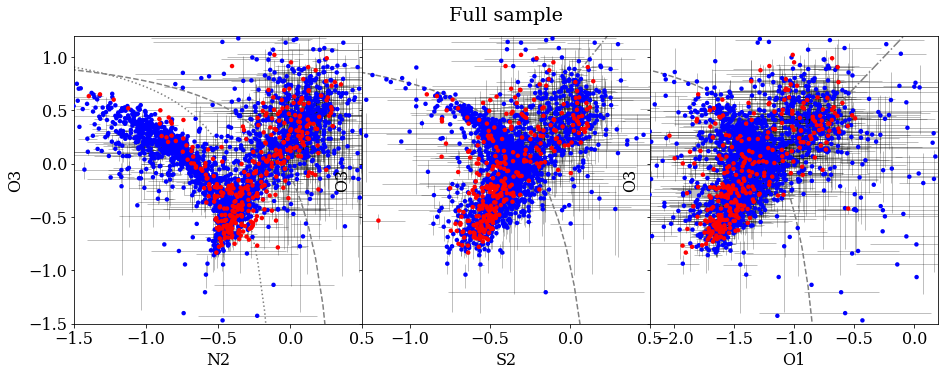

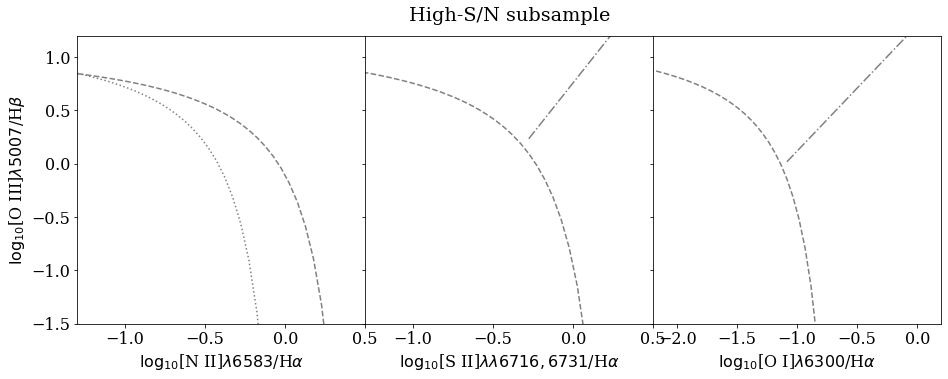

In [45]:
#######################################################################################
# BPT, where the RHP WHAV* galaxies are indicated by a different colour.
#######################################################################################
n = 10

# ALL GALAXIES
fig, axs = plot_empty_BPT_diagram(colorbar=False)
fig.suptitle("Full sample")
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    for in_rhp in [False, True]:
        cond = df_info["Total number of components in RHP of WHAV* diagram"] > n if in_rhp else\
               df_info["Total number of components in RHP of WHAV* diagram"] <= n
        plot2dscatter(df_info.loc[cond], 
                      col_x=f"{col_x} (total)", col_y="log O3 (total)",
                        markerfacecolor="b" if not in_rhp else "r", ax=axs[cc],
                        markeredgecolor="none",
                        markersize=20,
                        plot_colorbar=False)
    axs[cc].autoscale(enable=True, tight=True, axis=True)

# SUBSAMPLE ONLY
fig, axs = plot_empty_BPT_diagram(colorbar=False)
fig.suptitle("High-S/N subsample")
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    for in_rhp in [False, True]:
        cond = df_info_subsample["Total number of components in RHP of WHAV* diagram"] > n if in_rhp else\
               df_info_subsample["Total number of components in RHP of WHAV* diagram"] <= n
        plot2dscatter(df_info_subsample.loc[cond], 
                      col_x=f"{col_x} (total)", col_y="log O3 (total)",
                        markerfacecolor="b" if not in_rhp else "r", ax=axs[cc],
                        markeredgecolor="none",
                        markersize=20,
                        plot_colorbar=False)
    axs[cc].autoscale(enable=True, tight=True, axis=True)


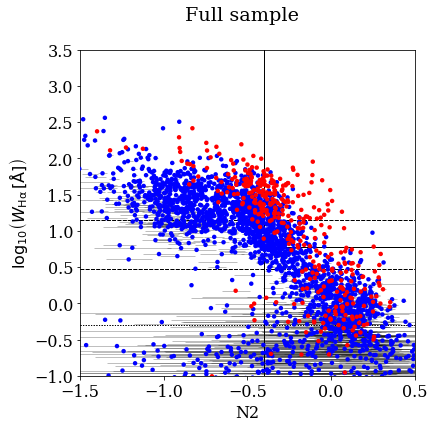

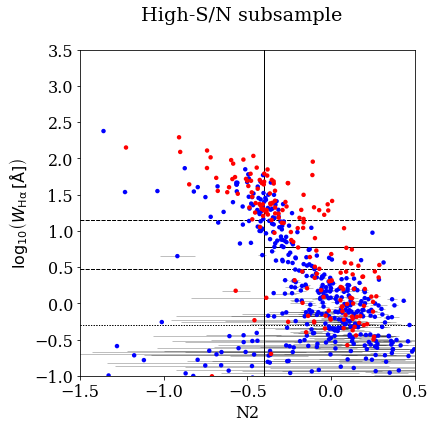

In [49]:
#######################################################################################
# WHAN diagram, where the RHP WHAV* galaxies are indicated by a different colour.
#######################################################################################
col_x = "log N2 (total)"
col_y = "log HALPHA EW"

ax = None
for in_rhp in [False, True]:
    cond = df_info["Total number of components in RHP of WHAV* diagram"] > n if in_rhp else\
           df_info["Total number of components in RHP of WHAV* diagram"] <= n
    fig = plot2dscatter(df_info.loc[cond], col_x="log N2 (total)", col_y="log HALPHA EW",
                        markerfacecolor="b" if not in_rhp else "r", ax=ax,
                        markeredgecolor="none",
                        markersize=20,
                        figsize=(6, 6),
                        plot_colorbar=False)
    fig.suptitle("Full sample")
    ax = fig.get_axes()[0]


ax = None
for in_rhp in [False, True]:
    cond = df_info_subsample["Total number of components in RHP of WHAV* diagram"] > n if in_rhp else\
           df_info_subsample["Total number of components in RHP of WHAV* diagram"] <= n
    fig = plot2dscatter(df_info_subsample.loc[cond], col_x="log N2 (total)", col_y="log HALPHA EW",
                        markerfacecolor="b" if not in_rhp else "r", ax=ax,
                        markeredgecolor="none",
                        markersize=20,
                        figsize=(6, 6),
                        plot_colorbar=False)
    fig.suptitle("High-S/N subsample")
    ax = fig.get_axes()[0]


## For those galaxies with spaxels in the RHP, what trends are there in terms of the *number* of spaxels?
---
i.e., do galaxies with higher fractions of spaxels in the RHP have stronger forbidden line ratios? etc.

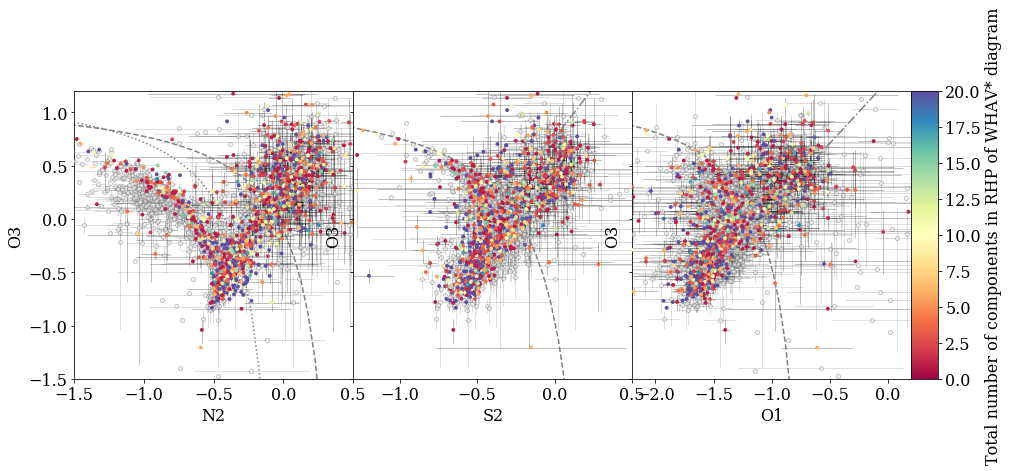

In [50]:
#######################################################################################
# BPT, coloured by the number of RHP spaxels
#######################################################################################
fig, axs, cax = plot_empty_BPT_diagram(colorbar=True)

for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Non-RHP spaxels
    plot2dscatter(df_info[df_info["Spaxels in RHP of WHAV* diagram?"] == False], 
                  col_x=f"{col_x} (total)", col_y="log O3 (total)", ax=axs[cc],
                  markerfacecolor="white", markeredgecolor="grey", alpha=0.5,
                    markersize=15, plot_colorbar=False)
    
    # RHP spaxels
    cond = df_info["Spaxels in RHP of WHAV* diagram?"]
    plot2dscatter(df_info[df_info["Spaxels in RHP of WHAV* diagram?"] == True], 
                  col_x=f"{col_x} (total)", col_y="log O3 (total)",
                  col_z="Total number of components in RHP of WHAV* diagram", ax=axs[cc],
                    markeredgecolor="none", vmin=0, vmax=20, cmap="Spectral",
                    markersize=15, plot_colorbar=True if cc == 2 else False, cax=cax)
    

    axs[cc].autoscale(enable=True, tight=True, axis=True)



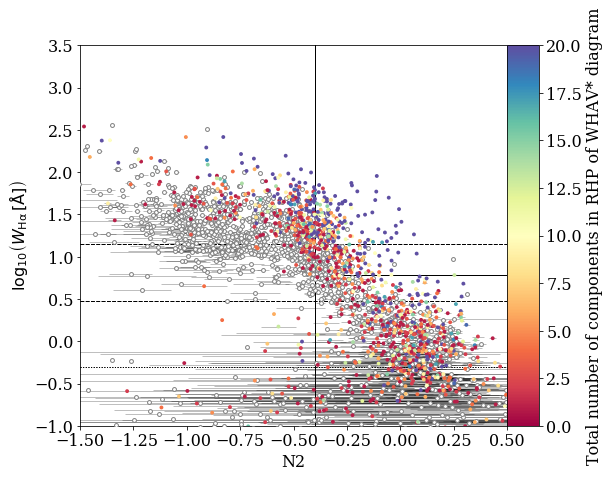

In [51]:
#######################################################################################
# WHAN, coloured by the number of RHP spaxels
#######################################################################################

# Non-RHP spaxels
fig = plot2dscatter(df_info[df_info["Spaxels in RHP of WHAV* diagram?"] == False], 
              col_x=f"log N2 (total)", col_y="log HALPHA EW", 
              markerfacecolor="white", markeredgecolor="grey",
                markersize=15, plot_colorbar=False)
ax = fig.get_axes()[0]

# RHP spaxels
cond = df_info["Spaxels in RHP of WHAV* diagram?"]
fig = plot2dscatter(df_info[df_info["Spaxels in RHP of WHAV* diagram?"] == True], 
              col_x=f"log N2 (total)", col_y="log HALPHA EW",
              col_z="Total number of components in RHP of WHAV* diagram",
                markeredgecolor="none", vmin=0, vmax=20, cmap="Spectral",
                ax=ax, markersize=15, plot_colorbar=True)



### Remarks
---
There is no clear separation between the "RHP" and "non-RHP" sample in the BPT diagrams.
In the WHAV diagram, the vast majority of galaxies falling in the "passive/retired galaxies" parameter space are non-RHP, and there seems to be an excess of RHP galaxies at higher EWs, in particular in the AGN quadrant of the diagram. Galaxies in this region also have larger numbers of components in the RHP.

This doesn't really tell us anything about shocks, however, as shocks can occur in galaxies dominated by star formation and AGN. 

## Spaxel-by-spaxel comparison
---
We just found that, when looking at the aperture emission line ratios and EWs, there is no stark difference between those galaxies with components in the RHP and those without.
So, let's compare the *spaxels* in these two sets of galaxies instead.

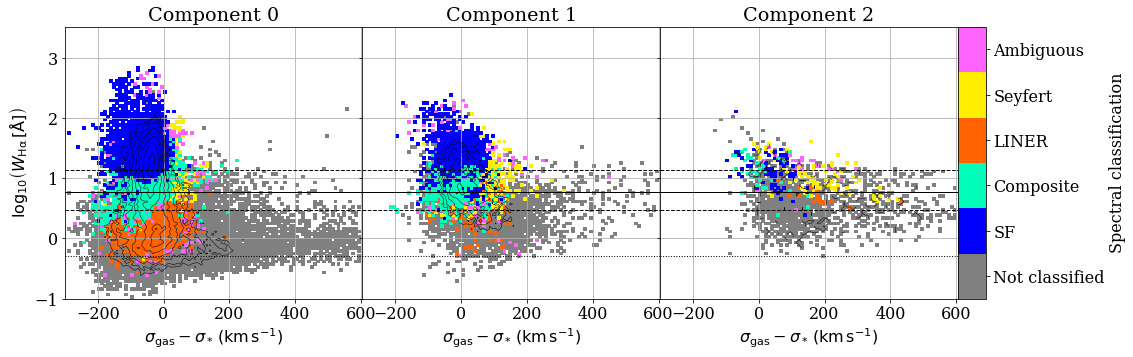

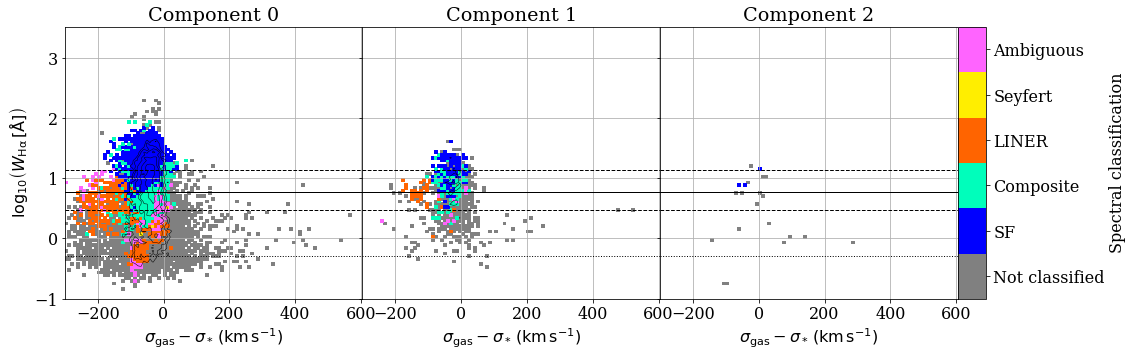

In [57]:
############################################################################
# WHAV diagram: LZIFU galaxies only
############################################################################
df_rhp = df_lzifu[df_lzifu["catid"].isin(gals_rhp)]
df_not_rhp = df_lzifu[df_lzifu["catid"].isin(gals_not_rhp)]

# Galaxies with spaxels in the RHP
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])
for ii in range(3):
    plot2dhistcontours(df=df_rhp,
                       col_x=f"sigma_gas - sigma_* (component {ii})",
                       col_y=f"log HALPHA EW (component {ii})",
                       col_z=f"BPT (numeric) (component {ii})", log_z=False,
                       plot_colorbar=True if ii == 2 else False,
                       cax=cax,
                       ax=axs[ii])
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None
    axs[ii].set_title(f"Component {ii}")
    axs[ii].grid()
    
# Galaxies with NO spaxels in the RHP
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])
for ii in range(3):
    plot2dhistcontours(df=df_not_rhp,
                       col_x=f"sigma_gas - sigma_* (component {ii})",
                       col_y=f"log HALPHA EW (component {ii})",
                       col_z=f"BPT (numeric) (component {ii})", log_z=False,
                       plot_colorbar=True if ii == 2 else False,
                       cax=cax,
                       ax=axs[ii])
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None
    axs[ii].set_title(f"Component {ii}")
    axs[ii].grid()
    

### Remarks
---

Meanwhile, there are virtually no spaxels with 3 components in which the 3rd component does *not* have $\Delta \sigma > 0$: **whenever a third component is present, that third component is nearly always kinematically disturbed**. The situation is similar for the 2nd component: in the RHP subsample, there are more spaxels with 2 components.


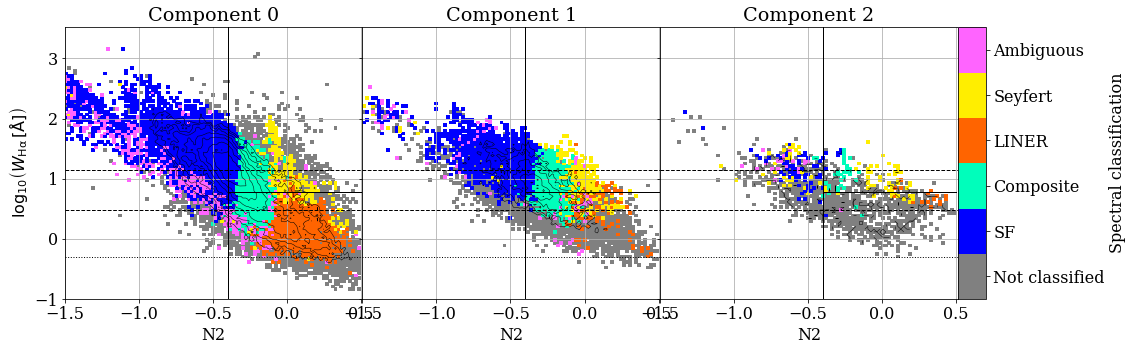

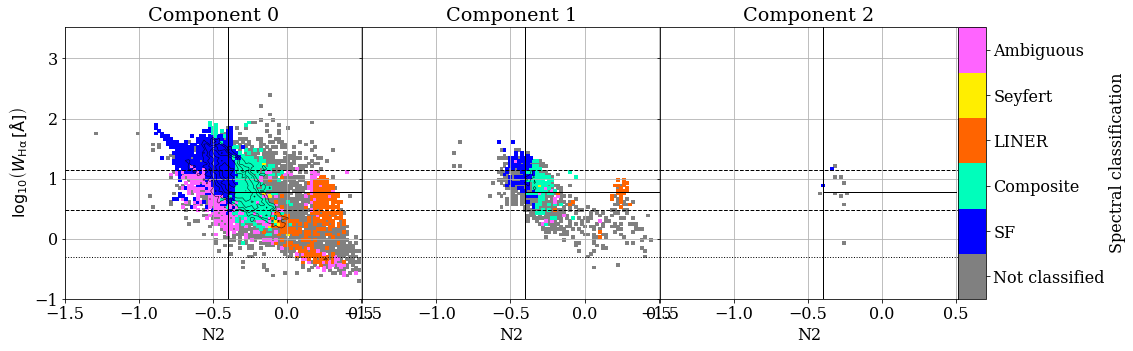

In [58]:
############################################################################
# WHAN diagram: LZIFU galaxies only
############################################################################
df_rhp = df_lzifu[df_lzifu["catid"].isin(gals_rhp)]
df_not_rhp = df_lzifu[df_lzifu["catid"].isin(gals_not_rhp)]

# Galaxies with spaxels in the RHP
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])
for ii in range(3):
    plot2dhistcontours(df=df_rhp,
                       col_x=f"log N2 (component {ii})",
                       col_y=f"log HALPHA EW (component {ii})",
                       col_z=f"BPT (numeric) (component {ii})", log_z=False,
                       plot_colorbar=True if ii == 2 else False,
                       cax=cax,
                       ax=axs[ii])
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None
    axs[ii].set_title(f"Component {ii}")
    axs[ii].grid()

# Galaxies with NO spaxels in the RHP
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.025, bbox.height])
for ii in range(3):
    plot2dhistcontours(df=df_not_rhp,
                       col_x=f"log N2 (component {ii})",
                       col_y=f"log HALPHA EW (component {ii})",
                       col_z=f"BPT (numeric) (component {ii})", log_z=False,
                       plot_colorbar=True if ii == 2 else False,
                       cax=cax,
                       ax=axs[ii])
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None
    axs[ii].set_title(f"Component {ii}")
    axs[ii].grid()


### Remarks
---
Looking at the component 0 WHAN diagrams, there doesn't appear to be a *huge* difference between the distributions of spaxels with components in the RHP and those without. 
Interestingly, in the galaxies without components in the RHP, there does appear to be a couple of LLAGN candidates. 


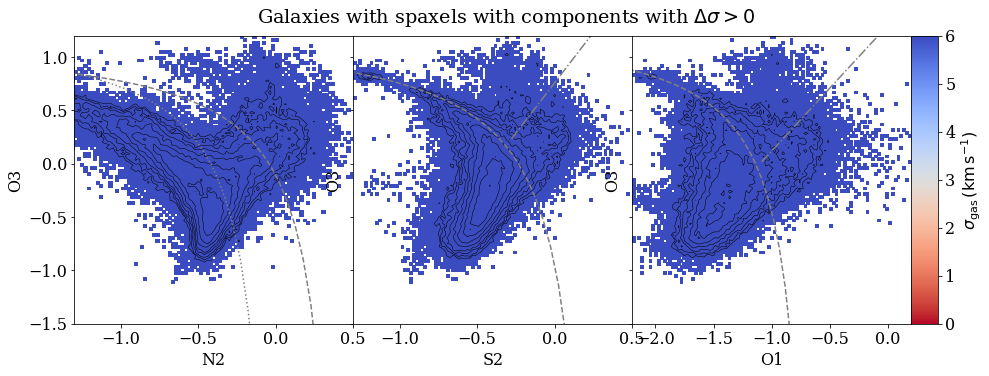

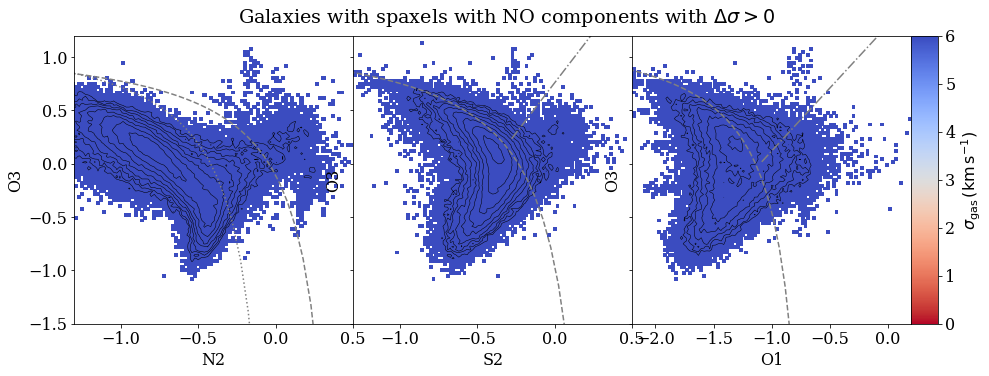

In [54]:
############################################################################
# BPT diagrams: whole SAMI sample (can only look at total emission line ratios in each spaxel)
############################################################################
# Define a new quantity
df_sami["sigma_* S/N"] = df_sami["sigma_*"] / df_sami["sigma_* error"] 

df_rhp = df_sami[df_sami["catid"].isin(gals_rhp)]
df_not_rhp = df_sami[df_sami["catid"].isin(gals_not_rhp)]

# Galaxies with spaxels in the RHP
fig, axs, cax = plot_empty_BPT_diagram(colorbar=True)
fig.suptitle(f"Galaxies with spaxels with components with $\Delta \sigma > 0$")
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    plot2dhistcontours(df=df_rhp,
                       col_x=f"{col_x} (total)",
                       col_y=f"log O3 (total)",
                       col_z="sigma_gas (component 0)", log_z=False,
                       vmin=0, vmax=6, cmap="coolwarm_r",
                       plot_colorbar=True if cc == 2 else False,
                       cax=cax,
                       ax=axs[cc])

# Galaxies with NO spaxels in the RHP
fig, axs, cax = plot_empty_BPT_diagram(colorbar=True)
fig.suptitle(f"Galaxies with spaxels with NO components with $\Delta \sigma > 0$")
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    plot2dhistcontours(df=df_not_rhp,
                       col_x=f"{col_x} (total)",
                       col_y=f"log O3 (total)",
                       col_z="sigma_gas (component 0)", log_z=False,
                       vmin=0, vmax=6, cmap="coolwarm_r",
                       plot_colorbar=True if cc == 2 else False,
                       cax=cax,
                       ax=axs[cc])

In [ ]:
df_metadata.loc[9008500001, ["ra_obj", "dec_obj", "mstar"]]

In [ ]:
cond = df_not_rhp["log N2 (total)"] > -0.3
cond &= df_not_rhp["log N2 (total)"] < 0
cond &= df_not_rhp["log O3 (total)"] > 0.7
df_not_rhp.loc[cond, "catid"]

ValueError: cannot reshape array of size 0 into shape (100,100)

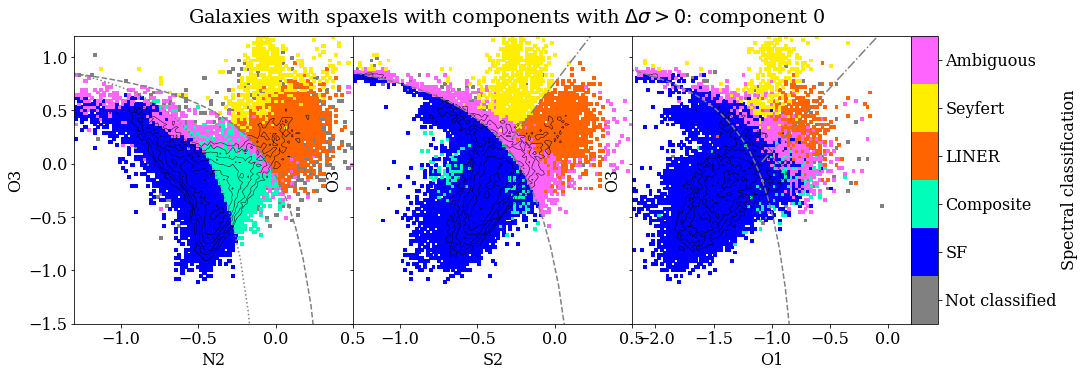

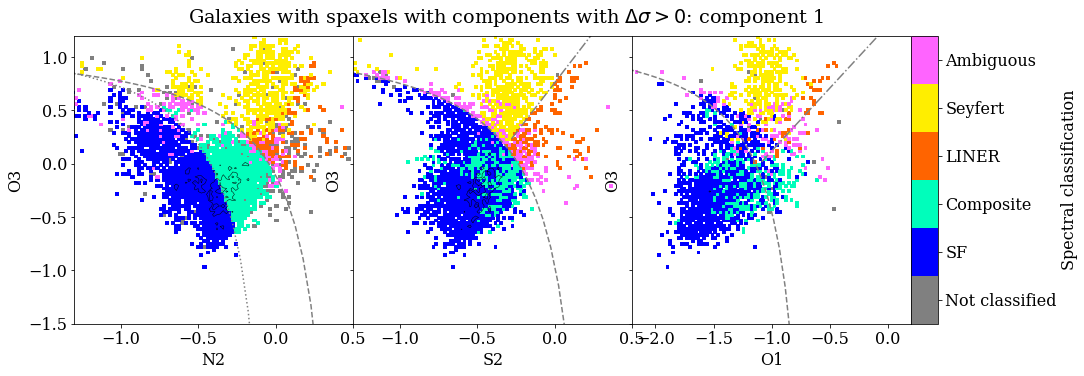

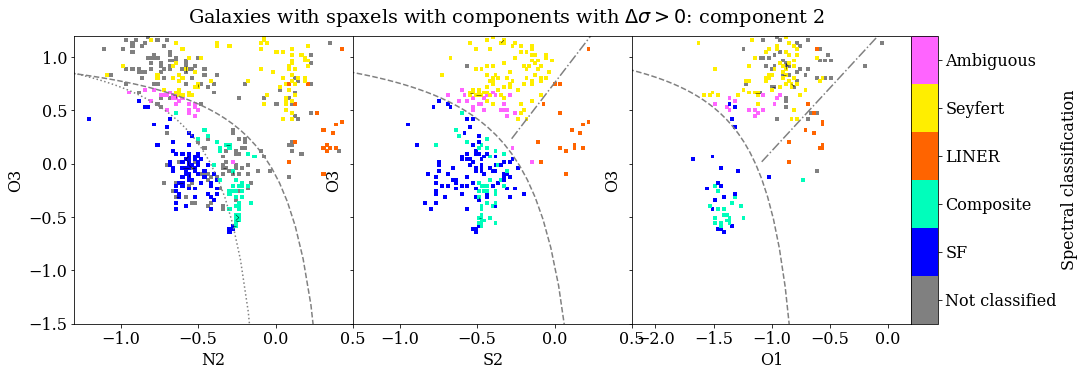

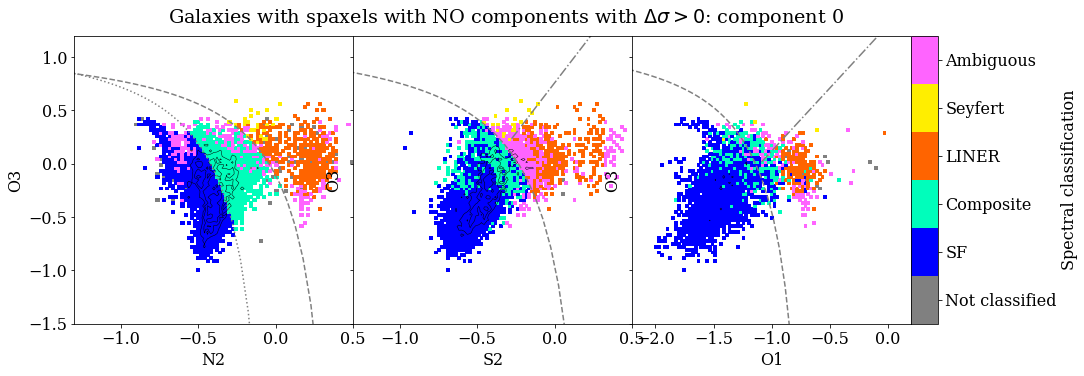

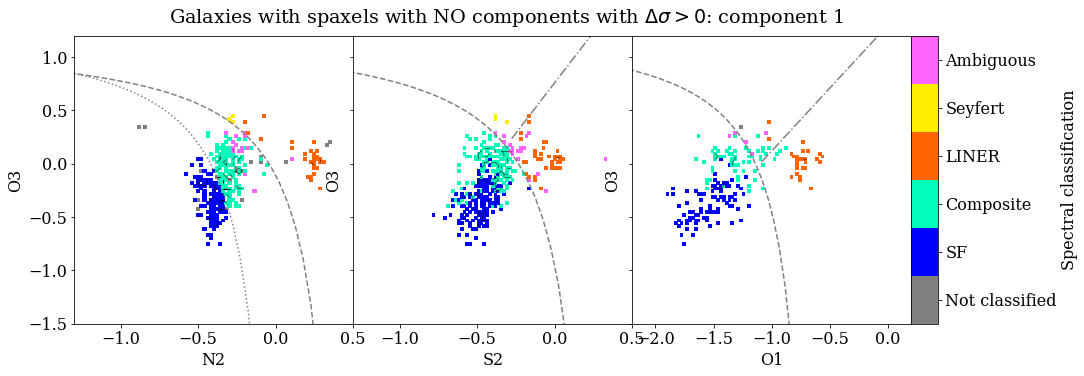

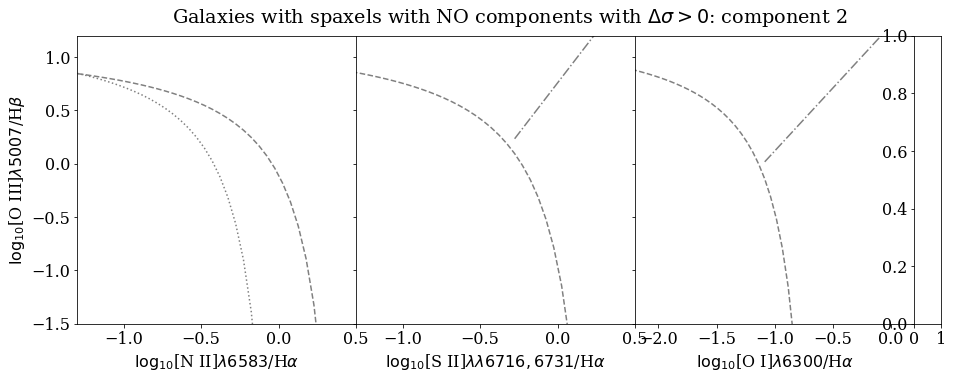

In [55]:
############################################################################
# BPT diagrams: have to use the high-S/N subset.
############################################################################
df_rhp = df_lzifu[df_lzifu["catid"].isin(gals_rhp)]
df_not_rhp = df_lzifu[df_lzifu["catid"].isin(gals_not_rhp)]

# Galaxies with spaxels in the RHP
for ii in range(3):
    fig, axs, cax = plot_empty_BPT_diagram(colorbar=True)
    fig.suptitle(f"Galaxies with spaxels with components with $\Delta \sigma > 0$: component {ii}")
    for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
        plot2dhistcontours(df=df_rhp,
                           col_x=f"{col_x} (component {ii})",
                           col_y=f"log O3 (component {ii})",
                           col_z=f"BPT (numeric) (component {ii})", log_z=False,
                           plot_colorbar=True if cc == 2 else False,
                           cax=cax,
                           ax=axs[cc])

# Galaxies with NO spaxels in the RHP
for ii in range(3):
    fig, axs, cax = plot_empty_BPT_diagram(colorbar=True)
    fig.suptitle(f"Galaxies with spaxels with NO components with $\Delta \sigma > 0$: component {ii}")
    for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
        plot2dhistcontours(df=df_not_rhp,
                           col_x=f"{col_x} (component {ii})",
                           col_y=f"log O3 (component {ii})",
                           col_z=f"BPT (numeric) (component {ii})", log_z=False,
                           plot_colorbar=True if cc == 2 else False,
                           cax=cax,
                           ax=axs[cc])

### Remarks
---
We divided the SAMI sample into 2 subsets: 
* galaxies with at least 1 emission line component with $\Delta \sigma > 0$ by at least $3\sigma$ (**RHP galaxies**)
* galazies with no emission line components with $\Delta \sigma > 0$ by at least $3\sigma$ (**non-RHP galaxies**)

In the full SAMI sample, there are 1075 RHP galaxies and 1931 non-RHP galaxies.
In our high-S/N subset, there are 420 RHP galaxies and 280 non-RHP galaxies.

The higher fraction of RHP galaxies in the high-S/N subset is probably due to the improved S/N in $\sigma_*$ that is achieved with a higher continuum S/N.

We made WHAV*, WHAN and BPT diagrams separately for the galaxies in the RHP and non-RHP subsets. 

#### WHAV* diagrams
---
Non-RHP galaxies appear to have fewer spaxels with >1 component. In particular, non-RHP galaxies hardly have any spaxels with 3 components, showing that in essentially all spaxels with 3 fitted components, the 3rd component has $\Delta \sigma > 0$. **So the presence of a 3rd kinematic component indicates the presence of non-gravitational motions in this sample of galaxies; this is not always true for the 2nd component, however.**

#### WHAN diagrams
---
As we saw in the single-component WHAV* diagrams, non-RHP galaxies hardly have any spaxels with 3 components. 
Other than that, there doesn't appear to be any major difference in the distributions of the RHP and non-RHP galaxies in the single-component WHAN diagrams. 
Interestingly there are a few galaxies exhibiting a strong HOLMES-LLAGN mixing sequence in the WHAN diagrams. 
So, **the presence of an LLAGN does not always mean that there will be a wind (but we need to look into these in more detail!)**

#### BPT diagrams
---
In the non-RHP sample, there are essentially no spaxels with Seyfert-like line ratios. Indeed, all of the spaxels in these galaxies have log O3 $\lesssim 0.4$.

Galaxies along the SF sequence in the non-RHP sample also appear to be skewed towards higher O3. However, if we colour the BPT diagram by the median $\sigma_*$ S/N, we find that non-RHP galaxies tend to have slightly lower $\sigma_*$ S/N values, which could be because star-forming galaxies with higher O3 tend to have lower stellar masses, and therefore a lower stellar continuum S/N. 

That is, in our high-S/N subsample of 700 galaxies, **all galaxies with Seyfert AGN have at least one spaxel with a component that shows non-gravitational motions: or, put another way, Seyfert AGN *always* have associated winds, or at the very least, turbulent motions in the gas.** 

## SUMMARY
---
To summarise,
* When a third kinematic component is present, it almost always has $\Delta \sigma > 0$.
* Galaxies with Seyfert AGN *always* have at least one kinematic component exhibiting non-gravitational motions.
* This is not the case for LLAGN.

To follow up:
* What is the nature of the LINER galaxies in the RHP sample? Are these bulge-dominated systems with a HOLMES 0th component, but a LLAGN or other 1st/2nd component?
* What is the nature of the LINER galaxies in the non-RHP sample? Why do these systems tend to have no non-gravitational motions in the gas?

To do:
* extract the catalog IDs of these galaxies.
* plot BPTs, with each component shown separately. Are the two samples very different?



In [ ]:
df_rhp = df_lzifu[df_lzifu["catid"].isin(gals_rhp)]
df_not_rhp = df_lzifu[df_lzifu["catid"].isin(gals_not_rhp)]

# Get: LINERs in the RHP sample
liners_rhp = []
n_liner_spaxels_rhp_0 = []
n_liner_spaxels_rhp_1 = []
n_liner_spaxels_rhp_2 = []
for gal in gals_rhp_subsample:
    df_gal = df_rhp[df_rhp["catid"] == gal]
    c_0 = len(df_gal[df_gal["BPT (component 0)"] == "LINER"])
    c_1 = len(df_gal[df_gal["BPT (component 1)"] == "LINER"])
    c_2 = len(df_gal[df_gal["BPT (component 2)"] == "LINER"])
    if (c_0 > 0) or (c_1 > 0) or (c_2 > 0):
        liners_rhp.append(gal)
        n_liner_spaxels_rhp_0.append(c_0)
        n_liner_spaxels_rhp_1.append(c_1)
        n_liner_spaxels_rhp_2.append(c_2)

print("RHP sample:")
for gal, n_0, n_1, n_2 in zip(liners_rhp, n_liner_spaxels_rhp_0, n_liner_spaxels_rhp_1, n_liner_spaxels_rhp_2):
    print(f"{gal}\t{n_0}\t{n_1}\t{n_2}")

# Get: LINERs in the non-RHP sample
liners_not_rhp = []
n_liner_spaxels_not_rhp_0 = []
n_liner_spaxels_not_rhp_1 = []
n_liner_spaxels_not_rhp_2 = []
for gal in gals_not_rhp_subsample:
    df_gal = df_not_rhp[df_not_rhp["catid"] == gal]
    c_0 = len(df_gal[df_gal["BPT (component 0)"] == "LINER"])
    c_1 = len(df_gal[df_gal["BPT (component 1)"] == "LINER"])
    c_2 = len(df_gal[df_gal["BPT (component 2)"] == "LINER"])
    if (c_0 > 0) or (c_1 > 0) or (c_2 > 0):
        liners_not_rhp.append(gal)
        n_liner_spaxels_not_rhp_0.append(c_0)
        n_liner_spaxels_not_rhp_1.append(c_1)
        n_liner_spaxels_not_rhp_2.append(c_2)


print("Non-RHP sample:")
for gal, n_0, n_1, n_2 in zip(liners_not_rhp, n_liner_spaxels_not_rhp_0, n_liner_spaxels_not_rhp_1, n_liner_spaxels_not_rhp_2):
    print(f"{gal}\t{n_0}\t{n_1}\t{n_2}")

# Get: LLAGN in the non-RHP sample


In [ ]:
liners_rhp

In [ ]:
col_z = "Number of components"
markers = ["o", ">", "D"]

for gal_list, label in zip([liners_rhp, liners_not_rhp], ["RHP LINERs", "non-RHP LINERs"]):

    ####################################################################################
    # Create a new figure
    ####################################################################################
    fig, axs = plot_empty_BPT_diagram()

    # Plot BPT diagram
    col_y = "log O3"
    axs[0].text(s=label, x=0.1, y=0.9, transform=axs[0].transAxes)
    for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
        # Plot full SAMI sample
        plot2dhistcontours(df=df_sami, 
                           col_x=f"{col_x} (total)",
                           col_y=f"{col_y} (total)", col_z="count", log_z=True,
                           alpha=0.5, cmap="gray_r",
                           ax=axs[cc], plot_colorbar=False) 

        # Plot LZIFU measurements
        for ii in range(3):
            plot2dscatter(df=df_lzifu.loc[df_lzifu["catid"].isin(gal_list)],
                          col_x=f"{col_x} (component {ii})",
                          col_y=f"{col_y} (component {ii})",
                          col_z=None if col_z == "Number of components" else col_z,
                          marker=markers[ii], ax=axs[cc], 
                          markersize=15,
                          markerfacecolor=component_colours[ii] if col_z == "Number of components" else None, 
                          markeredgecolor="none",
                          cax=cax if ii == 2 and col_z != "Number of components" else None,
                          plot_colorbar=True if ii == 2 and col_z != "Number of components" else False)

        # axis limits
        axs[cc].set_xlim(
            [np.nanmin([vmin_fn(col_x), 
                       np.nanmin([df_gal[f"{col_x} (component 0)"].min(), 
                                  df_gal[f"{col_x} (component 1)"].min(), 
                                  df_gal[f"{col_x} (component 2)"].min()]) - 0.1]),
             np.nanmax([vmax_fn(col_x), 
                       np.nanmax([df_gal[f"{col_x} (component 0)"].max(), 
                                  df_gal[f"{col_x} (component 1)"].max(), 
                                  df_gal[f"{col_x} (component 2)"].max()]) + 0.1])])
        # axis limits
        axs[cc].set_ylim(
            [np.nanmin([vmin_fn(col_y), 
                       np.nanmin([df_gal[f"{col_y} (component 0)"].min(), 
                                  df_gal[f"{col_y} (component 1)"].min(), 
                                  df_gal[f"{col_y} (component 2)"].min()]) - 0.1]),
             np.nanmax([vmax_fn(col_y), 
                       np.nanmax([df_gal[f"{col_y} (component 0)"].max(), 
                                  df_gal[f"{col_y} (component 1)"].max(), 
                                  df_gal[f"{col_y} (component 2)"].max()]) + 0.1])])

    # Decorations
    [ax.grid() for ax in axs]
    [ax.set_ylabel("") for ax in axs[1:]]
    [ax.set_yticklabels([]) for ax in axs[1:]]
    [ax.set_xticks(ax.get_xticks()[:-1]) for ax in axs[:-1]]
    [ax.collections[0].set_rasterized(True) for ax in axs]

    # Legend
    legend_elements = [Line2D([0], [0], marker=markers[ii], 
                              color="none", markeredgecolor="black",
                              label=f"Component {ii}",
                              markerfacecolor=component_colours[ii], markersize=5) for ii in range(3)]
    axs[-1].legend(handles=legend_elements, fontsize="x-small", loc="upper right")


### Remarks
---
The 2nd and 3rd components seem to "avoid" the LINER region of the BPT diagram, instead populating the composite, star-forming and Seyfert regions instead. This is most apparent in the S2 and O1 diagrams. 

Hypothesis: there exists some threshold accretion rate and/or Eddington ratio below which an AGN cannot launch a wind. This would explain why we see LLAGN in the non-RHP subsample, and no Seyferts. 

Want to look closely at the LLAGN visible in the WHAN diagram.

In [13]:
# Select AGN from the non-RHP sample 
cond = df_lzifu["catid"].isin(gals_not_rhp)
cond &= df_lzifu["log N2 (component 0)"] > 0
cond &= df_lzifu["log HALPHA EW (component 0)"] > 0.3
gals_llagn_not_rhp = df_lzifu[cond].catid.unique()
from IPython.core.debugger import Tracer

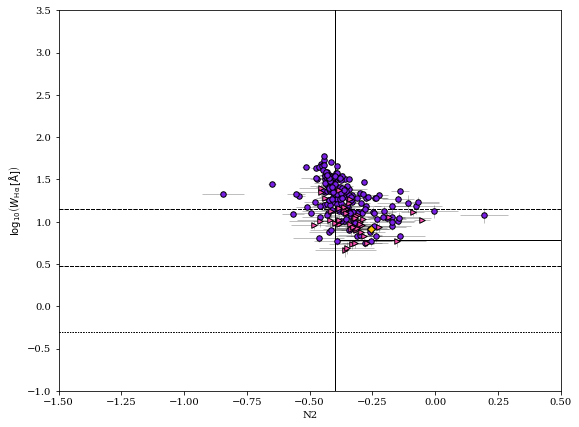

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`
  app.launch_new_instance()


> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> c


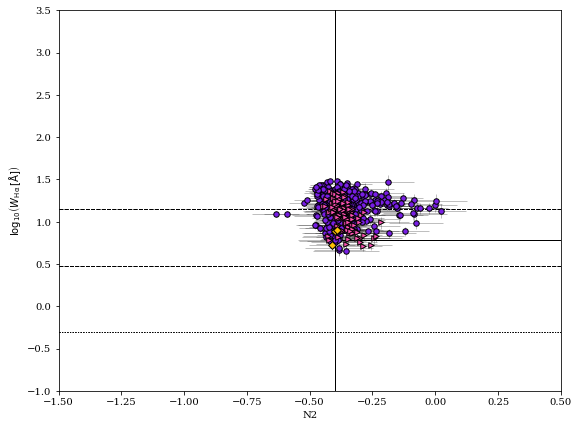

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`
  


> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
16026
ipdb> c


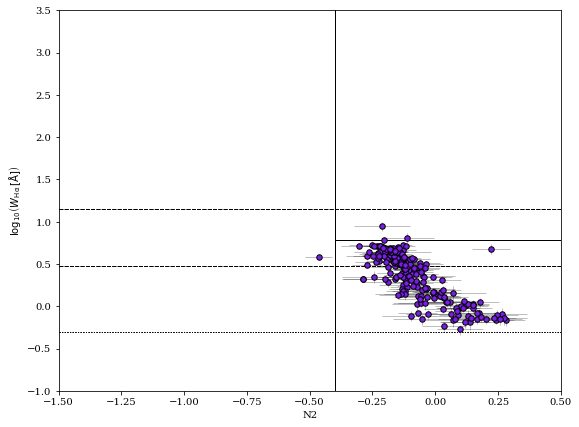

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
210228
ipdb> c


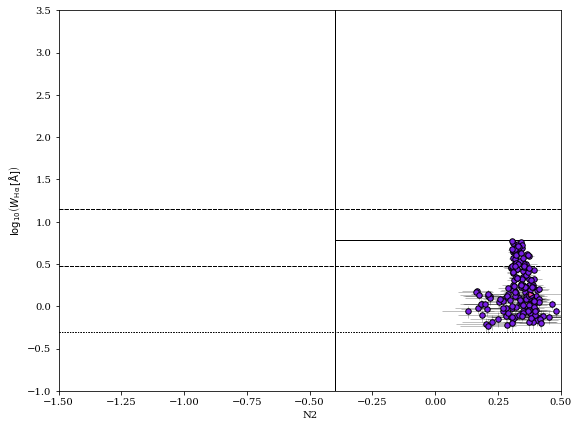

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
9008500002
ipdb> c


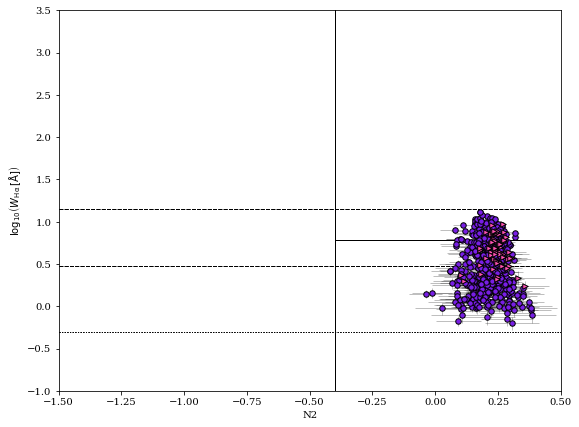

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
9388000001
ipdb> c


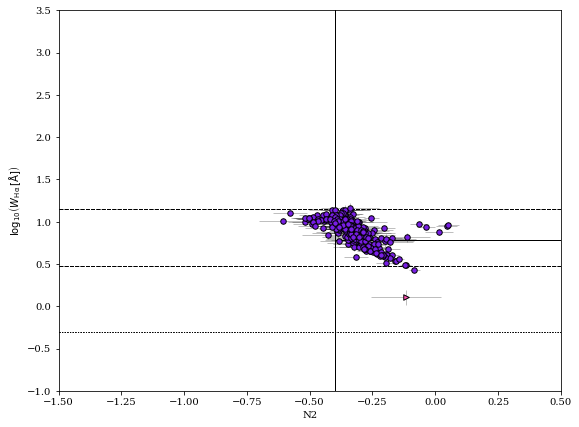

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
227123
ipdb> c


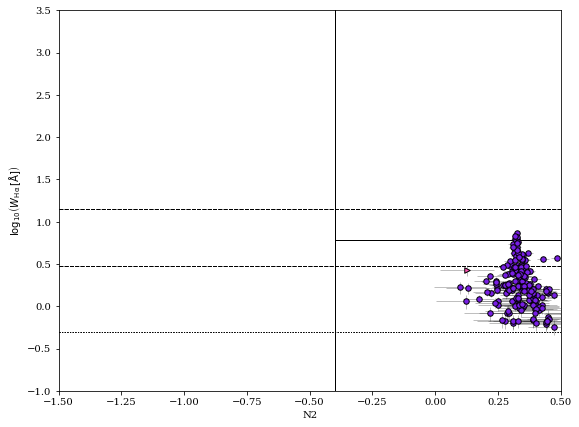

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
9008500001
ipdb> gal
9008500001
ipdb> c


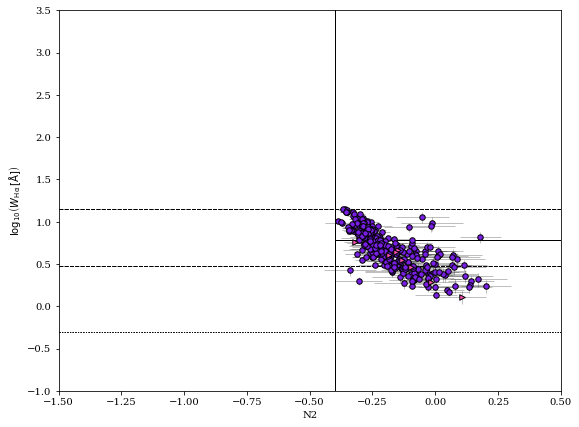

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
9239900641
ipdb> c


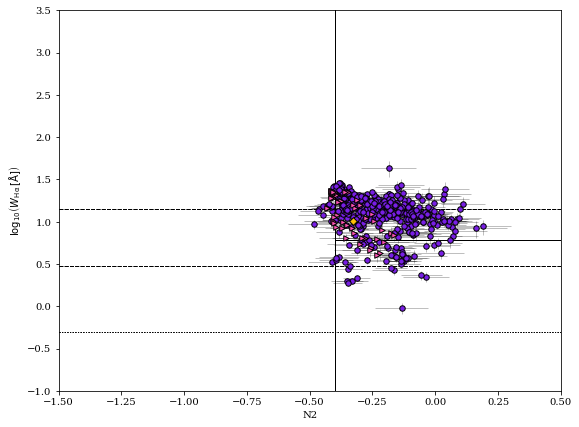

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
508908
ipdb> c


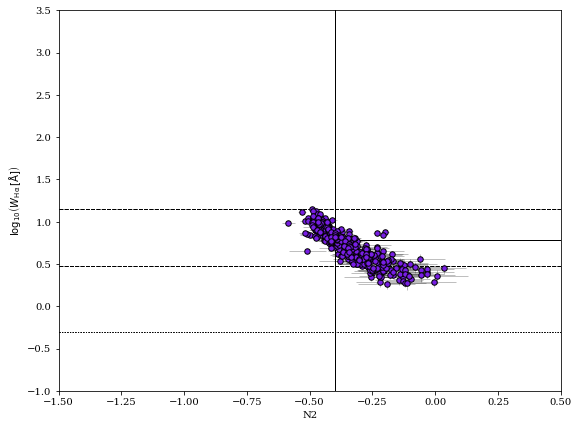

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
252005
ipdb> c


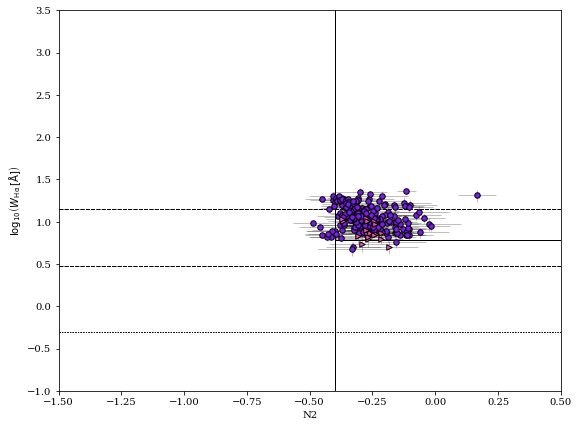

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
9016800131
ipdb> c


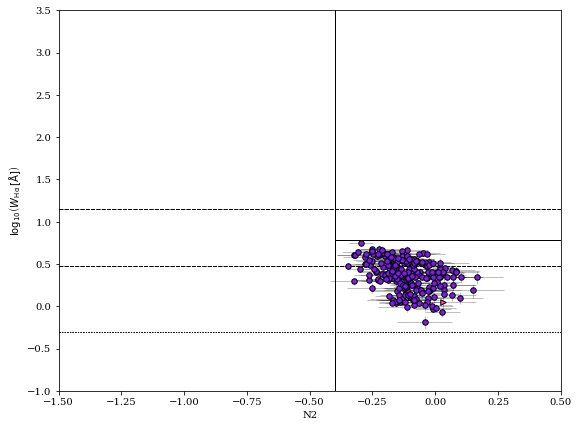

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> c


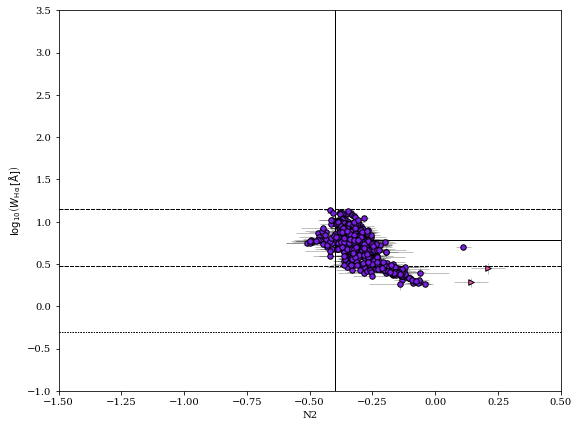

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> c


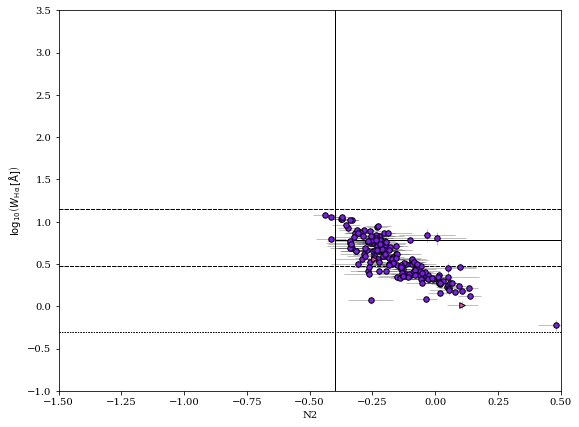

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> c


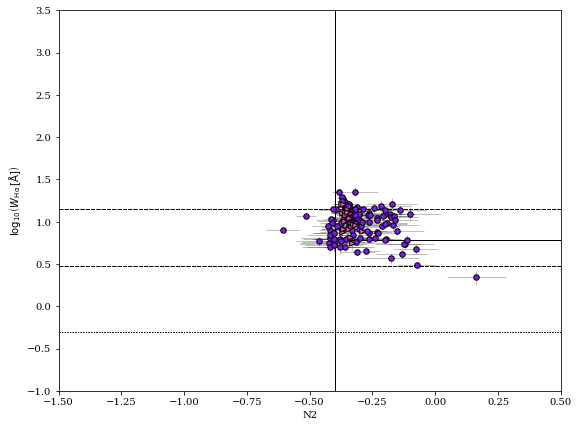

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
218713
ipdb> c


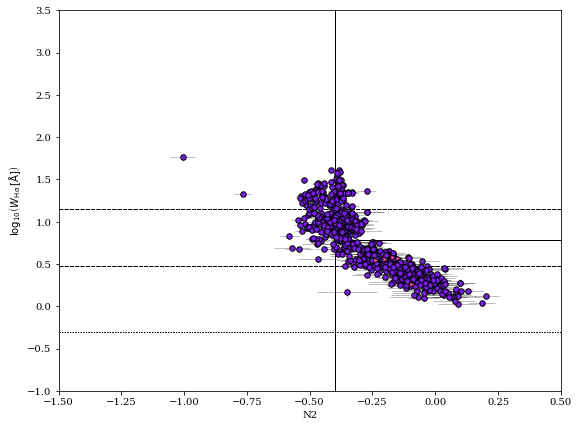

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
543998
ipdb> c


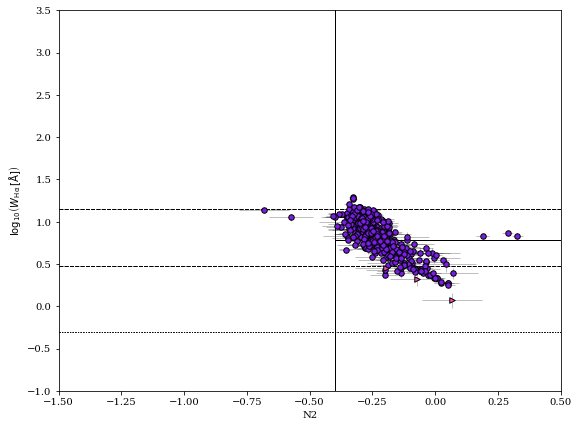

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> c


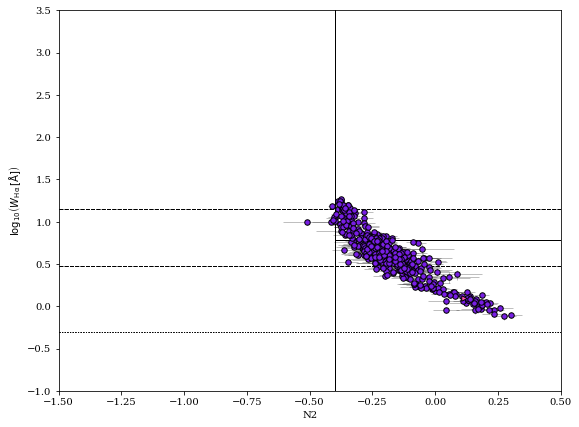

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> c


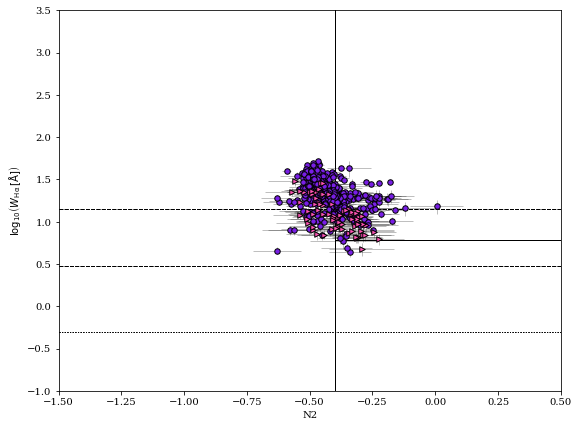

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
319064
ipdb> c


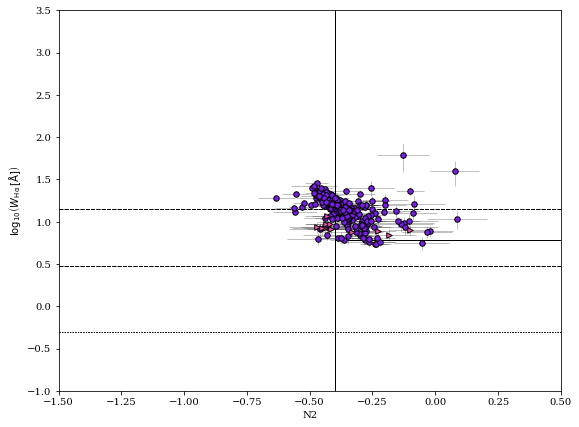

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
106634
ipdb> c


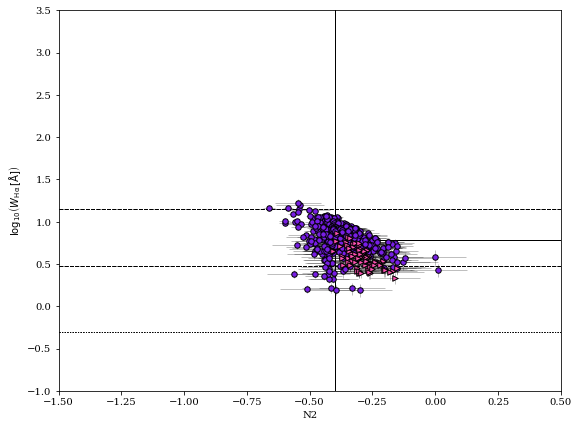

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
272990
ipdb> c


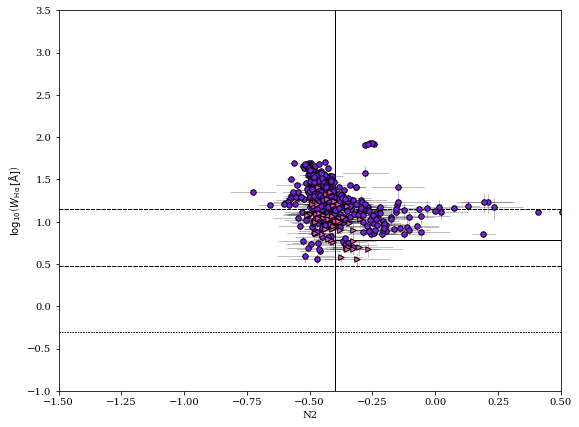

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
548947
ipdb> c


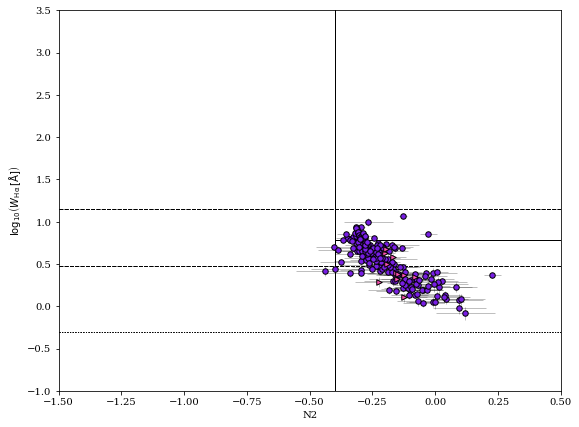

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> c


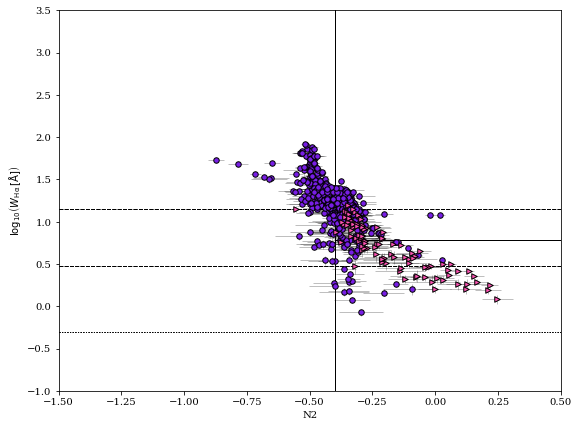

> <ipython-input-14-9d89a94893db>(2)<module>()
      1 col_z = "Number of components"
----> 2 for gal in gals_llagn_not_rhp:
      3     # Plot LZIFU measurements
      4     ax = None
      5     for ii in range(3):

ipdb> gal
550328
ipdb> c


In [14]:
col_z = "Number of components"
for gal in gals_llagn_not_rhp:
    # Plot LZIFU measurements
    ax = None
    for ii in range(3):
        fig = plot2dscatter(df=df_lzifu[df_lzifu["catid"] == gal],
                            col_x=f"log N2 (component {ii})",
                            col_y=f"log HALPHA EW (component {ii})",
                            col_z=None if col_z == "Number of components" else col_z,
                            marker=markers[ii], markersize=30, markeredgecolor="black",
                            markerfacecolor=component_colours[ii] if col_z == "Number of components" else None, 
                            ax=ax, cax=cax if ii == 2 and col_z != "Number of components" else None,
                            plot_colorbar=True if ii == 2 and col_z != "Number of components" else False)
        ax = fig.get_axes()[0]
    plt.show()
    Tracer()()



**Galaxies that clearly have AGN**: 
* 9008500002 (same galaxy as 9008500001!!) - nice LLAGN mixing sequence. Very high stellar velocity dispersion - very diffuse galaxy all-round. May be an edge case - central region has multiple broad components so there may still be a wind in this galaxy.
* 9388000001 - Again, nice LLAGN mixing similar to 9008500002. Odd "band" where there are 2 components: is there a big fat jet in this galaxy? Again, high stellar velocity dispersion (check this!!)
* 227123 - maybe has an AGN, but there are no spaxels in the Seyfert or LINER regions (at least in the 1-component fit)
* 9239900641 - edge-on spiral. Possible AGN, scatter in the WHAN. No spaxels in LINER or Seyfert regions of BPT.
* 508908 - borderline Seyfert/LINER AGN. No spaxels in LINER or Seyfert regions of BPT but clear mixing sequence in WHAN.
* 252005 - looks like a high-metallicity spiral. Difficult to tell if LLAGN


In [64]:
df_info.loc[9388000001, "mstar"]

11.537902

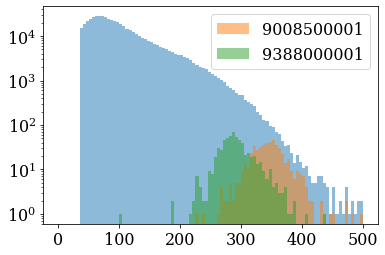

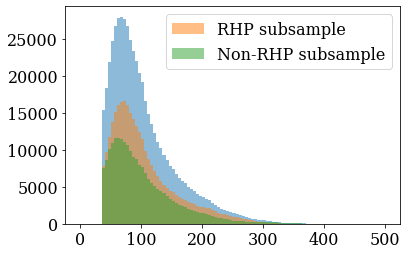

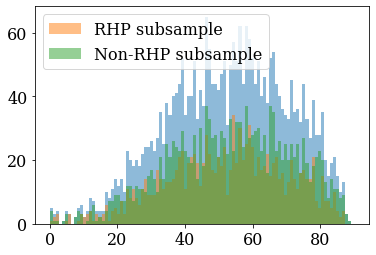

In [60]:
# 9388000001 and 9008500001 have weirdly high velocity dispersions compared to the rest of the SAMI sample
fig, ax = plt.subplots(nrows=1, ncols=1)
_ = ax.hist(df_sami["sigma_*"], alpha=0.5, density=False, range=(0, 500), bins=100)
_ = ax.hist(df_sami.loc[df_sami["catid"] == 9008500002, "sigma_*"], alpha=0.5, density=False, range=(0, 500), bins=100, label="9008500001")
_ = ax.hist(df_sami.loc[df_sami["catid"] == 9388000001, "sigma_*"], alpha=0.5, density=False, range=(0, 500), bins=100, label="9388000001")
ax.set_yscale("log")
ax.legend()

# Query: do the RHP and non-RHP have significantly different stellar velocity dispersion distributions?
fig, ax = plt.subplots(nrows=1, ncols=1)
_ = ax.hist(df_sami["sigma_*"], alpha=0.5, density=False, range=(0, 500), bins=100)
_ = ax.hist(df_sami.loc[df_sami["catid"].isin(gals_rhp), "sigma_*"], alpha=0.5, density=False, range=(0, 500), bins=100, label="RHP subsample")
_ = ax.hist(df_sami.loc[df_sami["catid"].isin(gals_not_rhp), "sigma_*"], alpha=0.5, density=False, range=(0, 500), bins=100, label="Non-RHP subsample")
# ax.set_yscale("log")
ax.legend()

# Query: do the RHP and non-RHP have significantly different inclination distributions? No!
fig, ax = plt.subplots(nrows=1, ncols=1)
_ = ax.hist(df_info["Inclination i (degrees)"], alpha=0.5, density=False, range=(0, 90), bins=100)
_ = ax.hist(df_info.loc[df_info["catid"].isin(gals_rhp), "Inclination i (degrees)"], alpha=0.5, density=False, range=(0, 90), bins=100, label="RHP subsample")
_ = ax.hist(df_info.loc[df_info["catid"].isin(gals_not_rhp), "Inclination i (degrees)"], alpha=0.5, density=False, range=(0, 90), bins=100, label="Non-RHP subsample")
# ax.set_yscale("log")
ax.legend()

### Remarks
---
There are a couple of galaxies (how many?) with very large stellar velocity dispersions. These include 9008500001 and 9388000001 (the latter of which is the one without an SDSS image, that has a large "band" of 2-component spaxels). Interestingly both of these have strong AGN signatures in the WHAN diagram. 